# Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Attribute Information:
 1. age: continuous.
 2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 3. fnlwgt: continuous.
 4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 5. education-num: continuous.
 6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,   Priv-house-serv, Protective-serv, Armed-Forces.
 8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 10. sex: Female, Male.
 11. capital-gain: continuous.
 12. capital-loss: continuous.
 13. hours-per-week: continuous.
 14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia,El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 class: >50K, <=50K

### Notes for Delve
1. One prototask (income) has been defined, using attributes 1-13 as inputs and income level as a binary target.
2. Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country). The prototask only uses cases with no missing values.
3. The income prototask comes with two priors, differing according to if attribute 4 (education) is considered to be nominal or ordinal.

In [3]:
print(data.shape)

(48842, 15)


# Remove unsuable data points

In [4]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

#### Replacing ? with Nan 

In [5]:
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)

results:
1. no null or Nan Value.but the dataset is not using the default nan string for missing values, instead "?" is used. after convert '?' to Nan three columns ['workclass','occupation','native-country] have nan
2. there are 52 duplicated row.


In [6]:
df = data.copy()

In [7]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


## Remove nan value

In [8]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.shape

(45222, 15)

## Remove Duplicated

In [10]:
df = df.drop_duplicates()

In [11]:
info = pd.DataFrame(df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df.isna().sum(),True)
info.insert(2,"Duplicate",df.duplicated().sum(),True)
info.insert(3,"Unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,16,7,14,6,5,2,121,97,96,41,2


In [12]:
df.shape

(45175, 15)

# remove educational-num, capital-gain, capital-loss

#### Check 'education' & 'educational-num' columns

In [13]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [14]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

* As we can see, 'education' & 'educational-num' both columns have similer values.
* 'education' has string values
* 'educational-num' has numerical values
* all HS-grad from education represents 9 in education-num
* all Masters from education represents 14 in education-num and likewise.
* Both columns conveying same information
* So, we can remove 'education-num' colum

#### plot capital-gain, and capital-loss columns¶


Text(0.5, 1.0, 'Histogram')

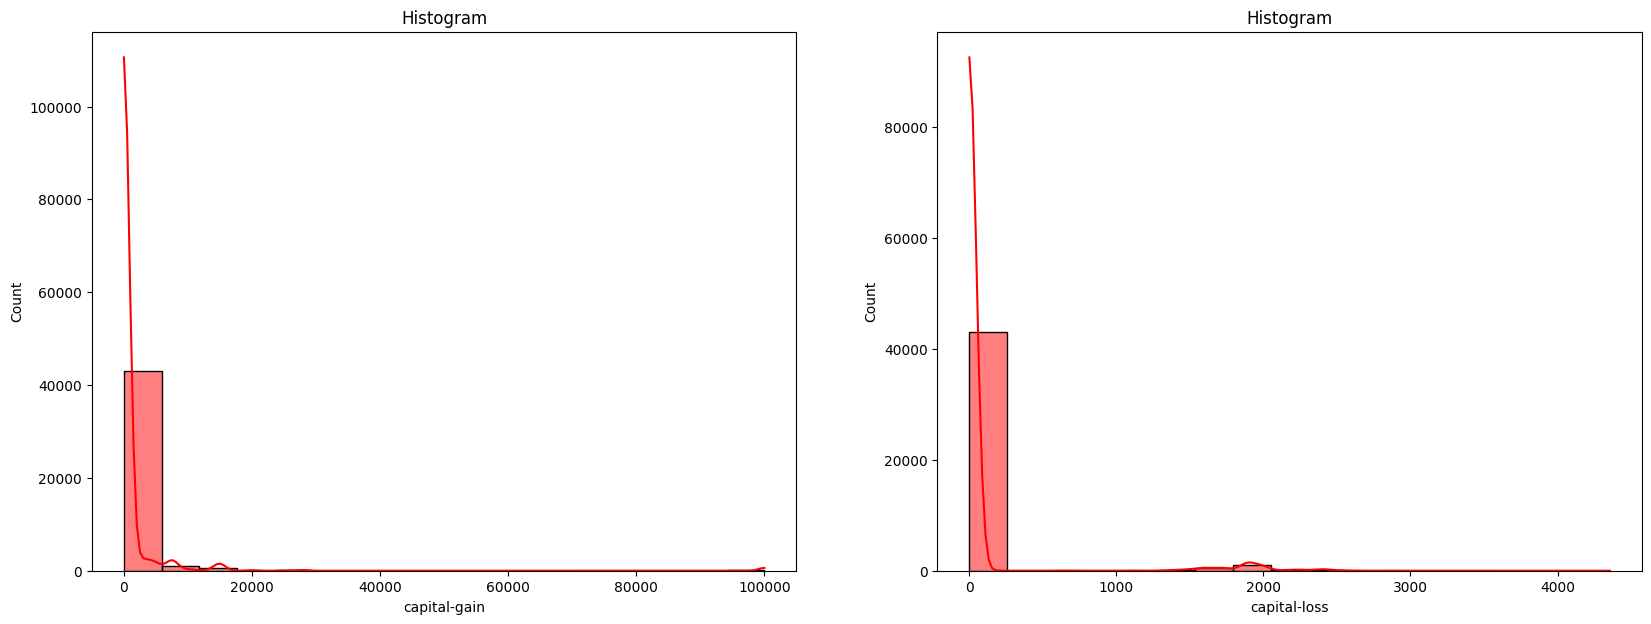

In [15]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['capital-gain'], kde = True,color='r')
plt.title('Histogram')
plt.subplot(1, 2, 2)
sns.histplot(df['capital-loss'], kde = True,color='r')
plt.title('Histogram')

[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00.
So, we can drop both [ 'capital-gain' ] & [ 'capital-loss' ] columns and [ 'educational-num' ] columns

In [16]:
df1 = df.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


# Convert categorical cate to numerical using LableEncoder

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder_gender = preprocessing.LabelEncoder()
df1['gender'] = label_encoder_gender.fit_transform(df1['gender'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_gender.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_workclass = preprocessing.LabelEncoder()
df1['workclass'] = label_encoder_workclass.fit_transform(df1['workclass'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_workclass.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_education = preprocessing.LabelEncoder()
df1['education'] = label_encoder_education.fit_transform(df1['education'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_education.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_marital_status = preprocessing.LabelEncoder()
df1['marital-status'] = label_encoder_marital_status.fit_transform(df1['marital-status'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_marital_status.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_occupation = preprocessing.LabelEncoder()
df1['occupation'] = label_encoder_occupation.fit_transform(df1['occupation'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_occupation.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_relationship = preprocessing.LabelEncoder()
df1['relationship'] = label_encoder_relationship.fit_transform(df1['relationship'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_relationship.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_race = preprocessing.LabelEncoder()
df1['race'] = label_encoder_race.fit_transform(df1['race'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_race.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_native_country = preprocessing.LabelEncoder()
df1['native-country'] = label_encoder_native_country.fit_transform(df1['native-country'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_native_country.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)

label_encoder_income = preprocessing.LabelEncoder()
df1['income'] = label_encoder_income.fit_transform(df1['income'])
mapping = {encoded: original for encoded, original in enumerate(label_encoder_income.classes_)}
print("Mapping von encodierten Labels zu ursprünglichen Strings:")
print(mapping)


Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Female', 1: 'Male'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
Mapping von encodierten Labels zu ursprünglichen Strings:
{0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-

In [19]:
df1

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,226802,1,4,6,3,2,1,40,38,0
1,38,2,89814,11,2,4,0,4,1,50,38,0
2,28,1,336951,7,2,10,0,4,1,40,38,1
3,44,2,160323,15,2,6,0,2,1,40,38,1
5,34,2,198693,0,4,7,1,4,1,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,2,12,5,4,0,38,38,0
48838,40,2,154374,11,2,6,0,4,1,40,38,1
48839,58,2,151910,11,6,0,4,4,0,40,38,0
48840,22,2,201490,11,4,0,3,4,1,20,38,0


### check again for unsuable data points

In [20]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T    


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,8,8,8,8,8,8,8,8,8,8,8,8
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


In [21]:
df1 = df1.drop_duplicates()

In [22]:
# Check For Missing Values
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


### print Correlation Matrix

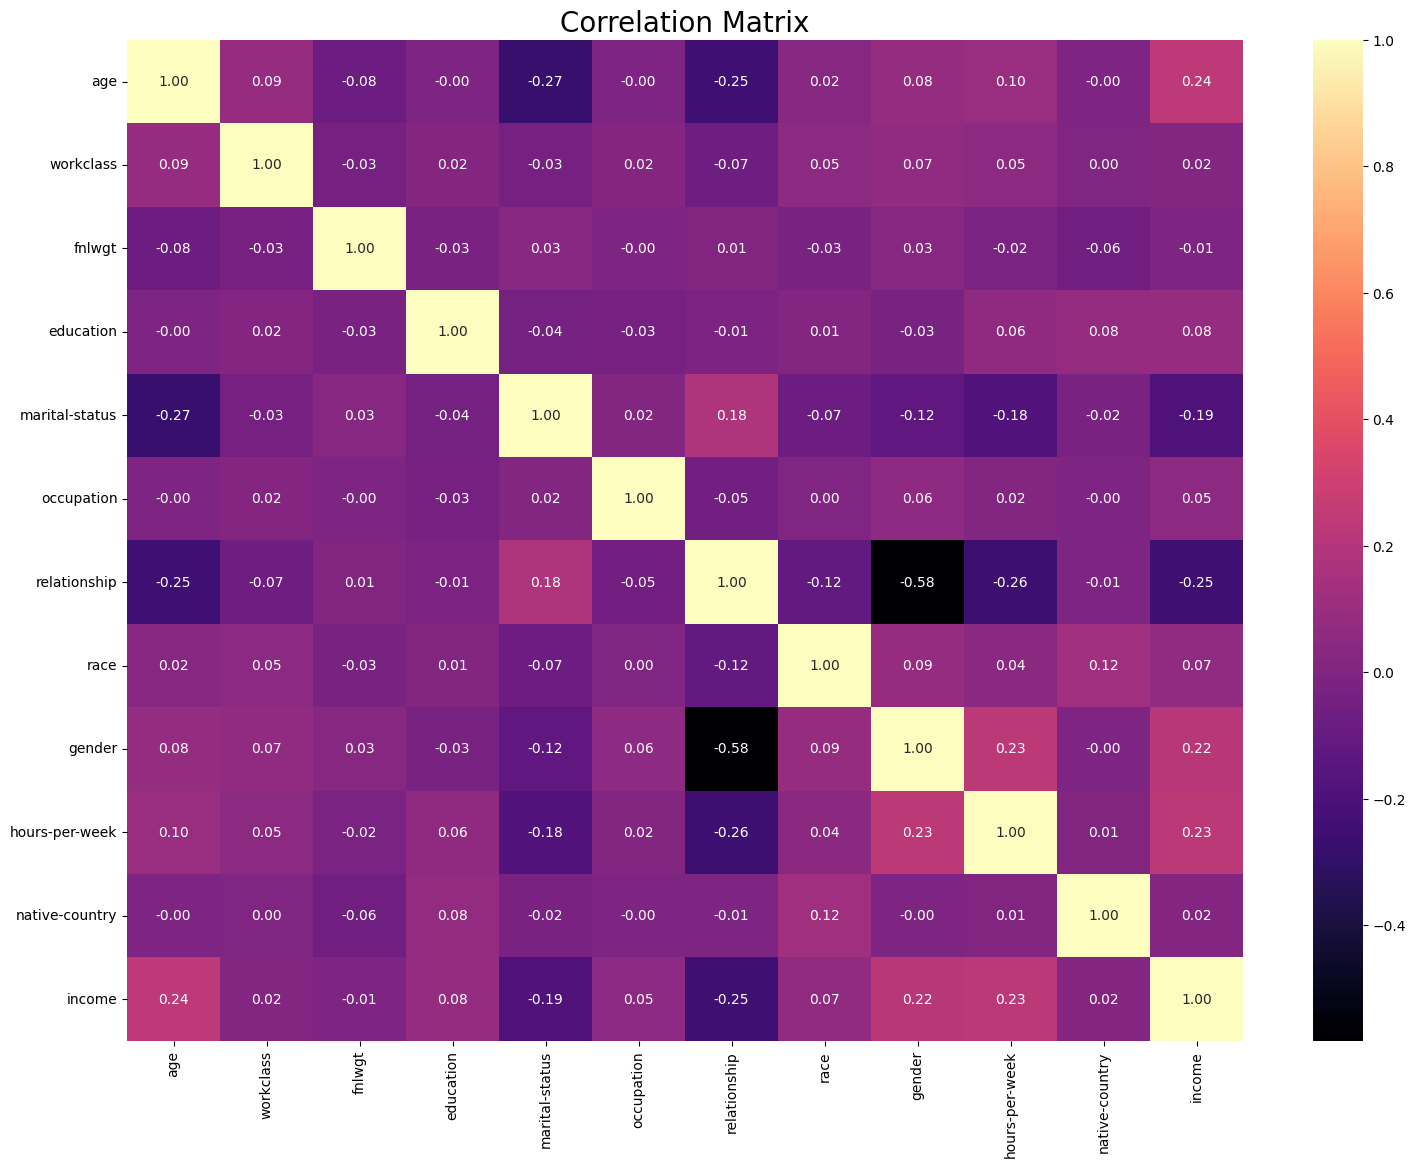

In [23]:
# Correlation matrix
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df1.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

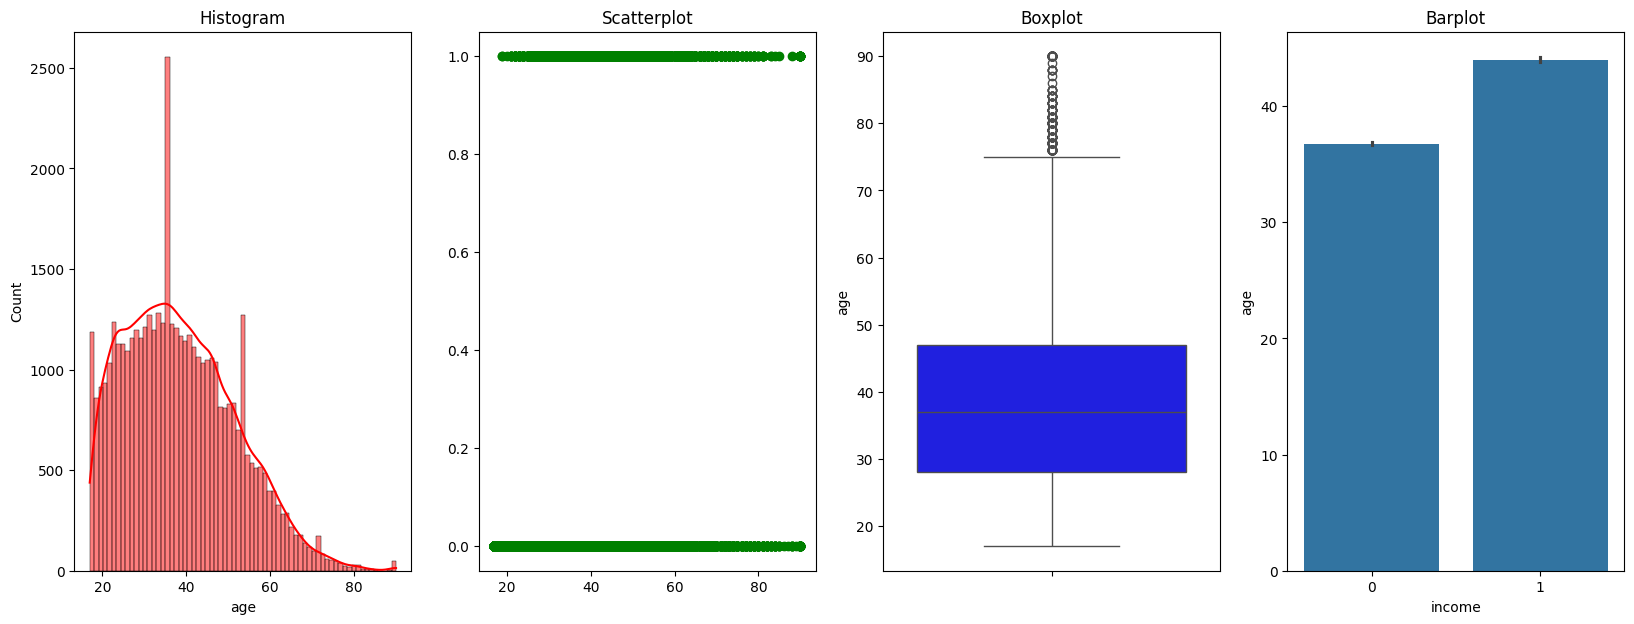

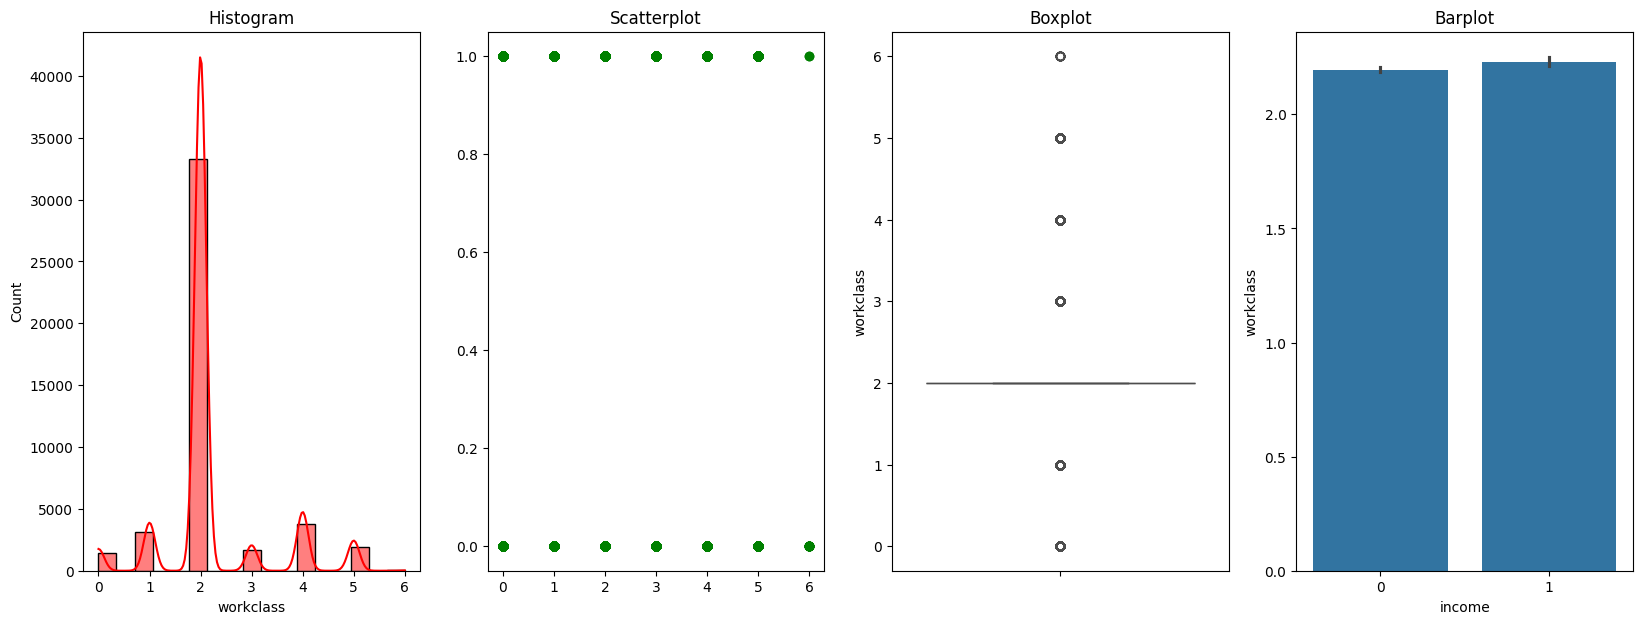

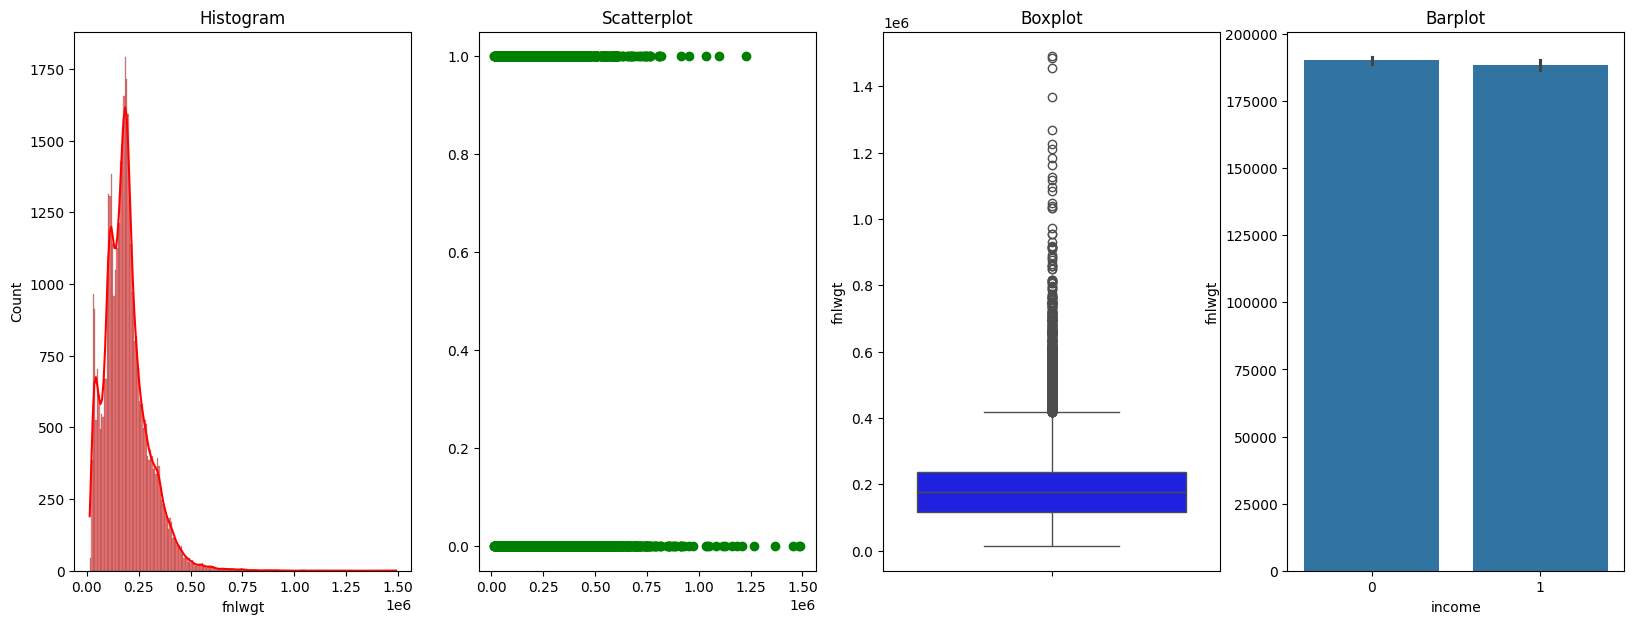

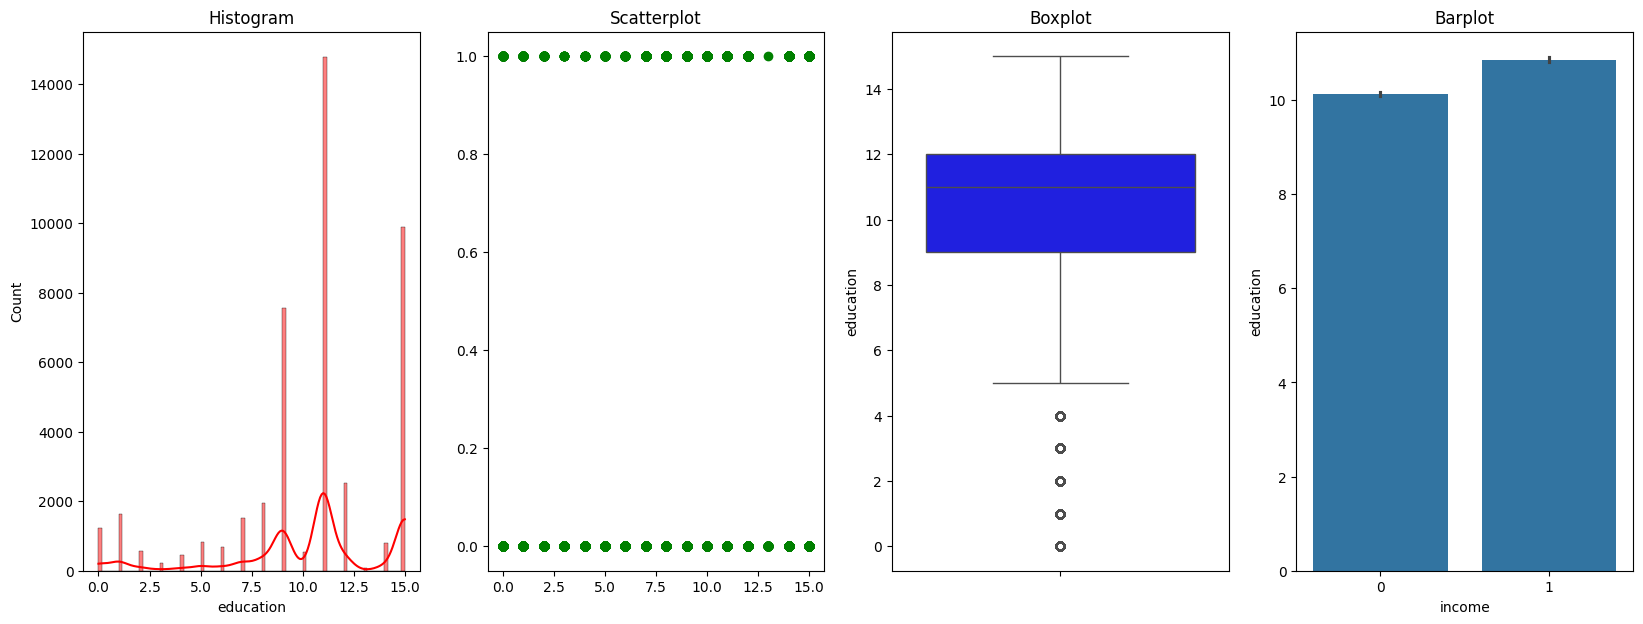

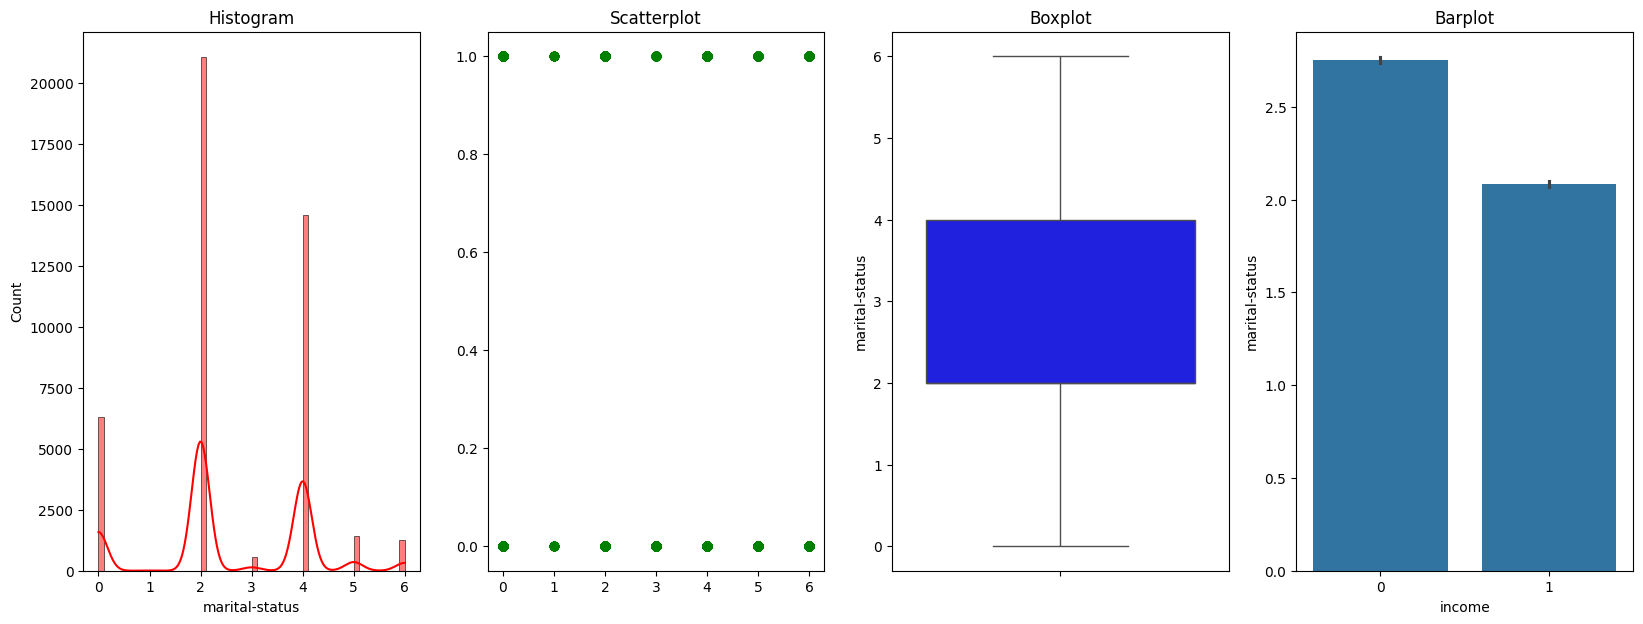

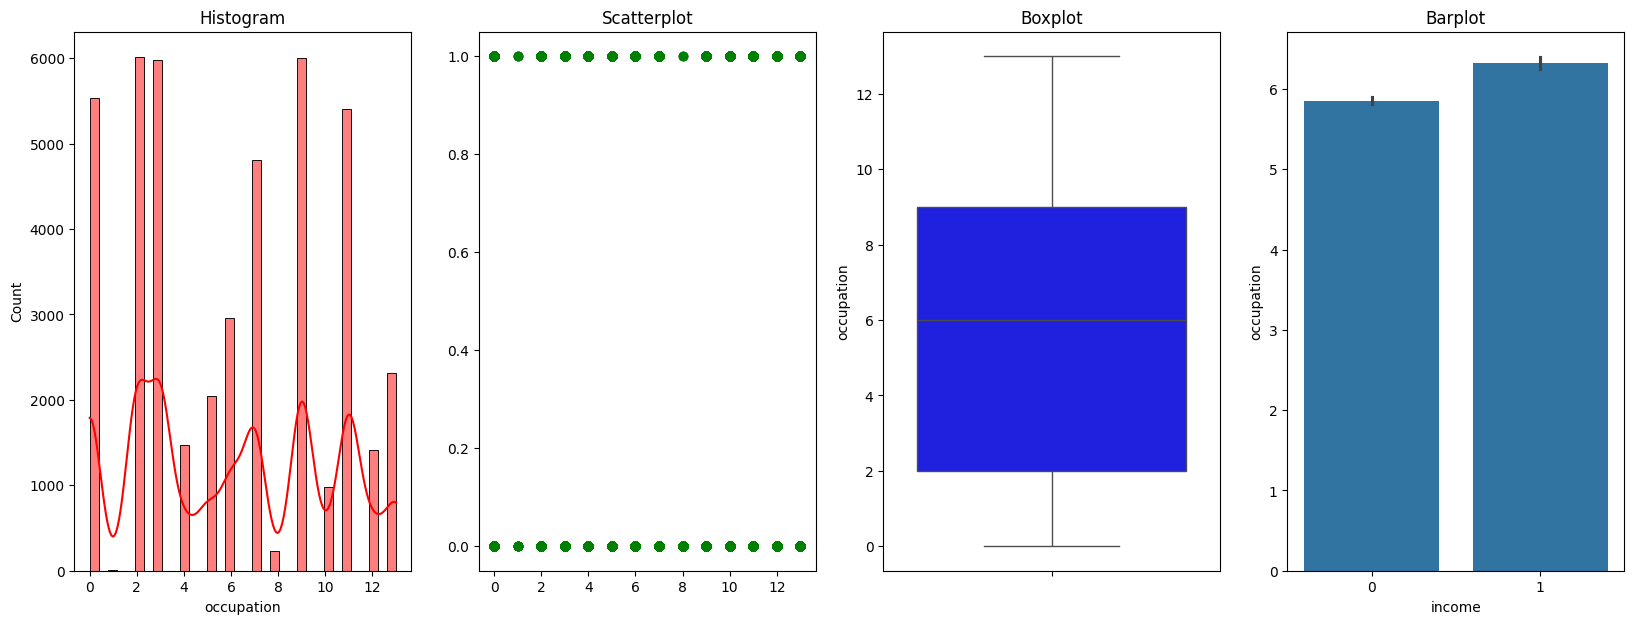

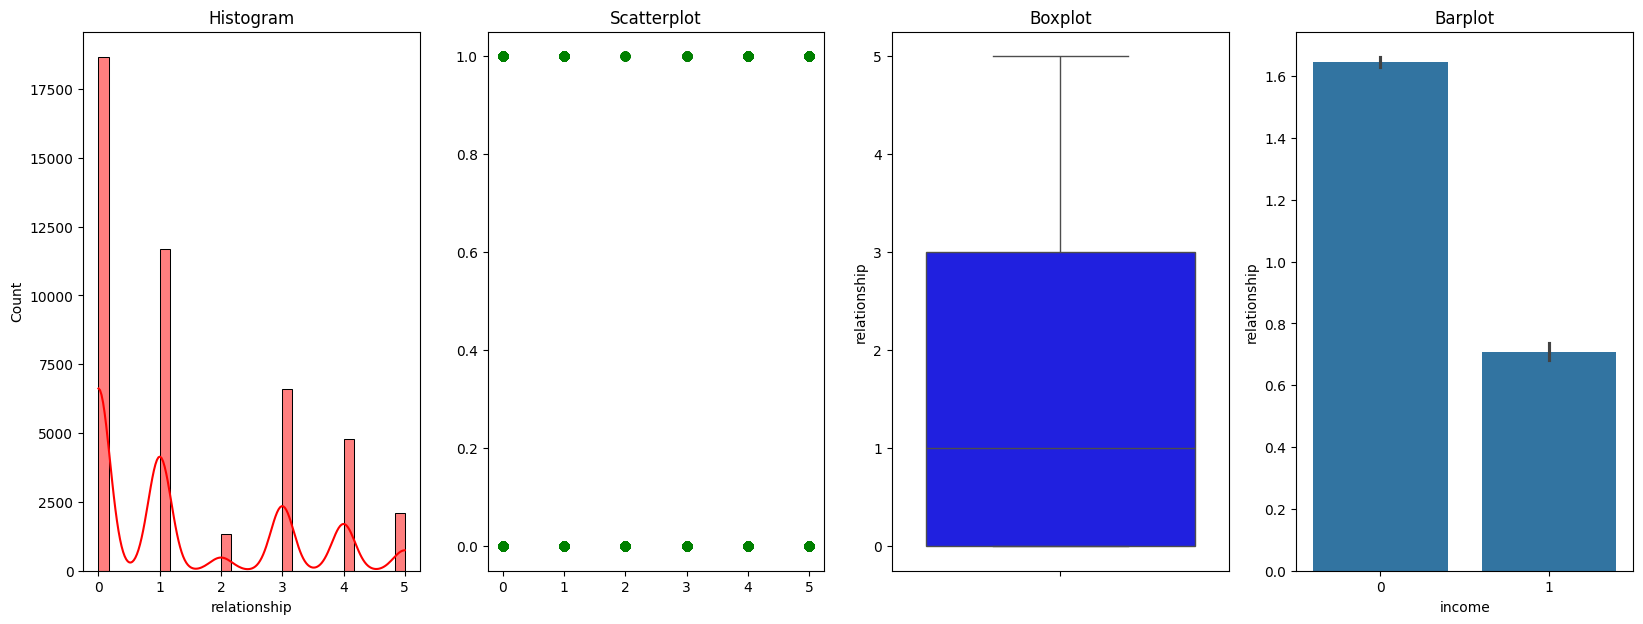

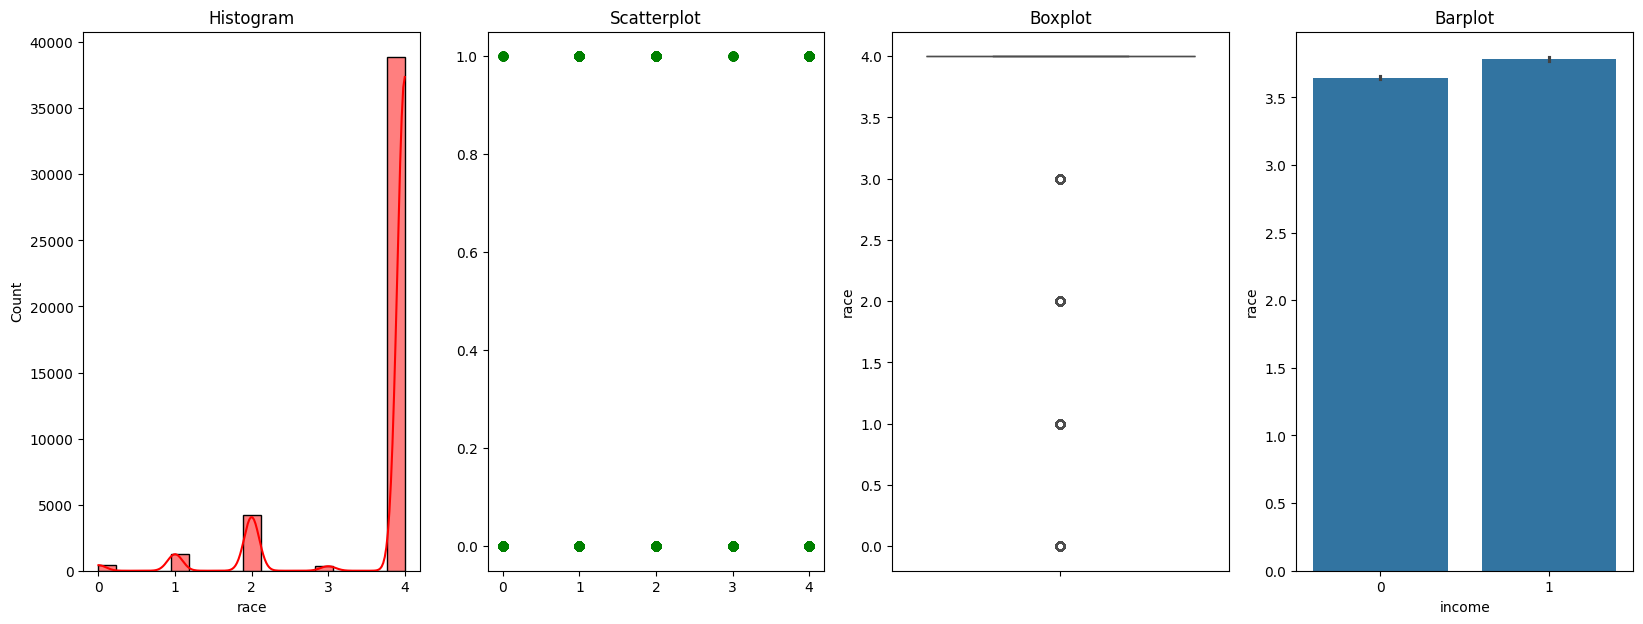

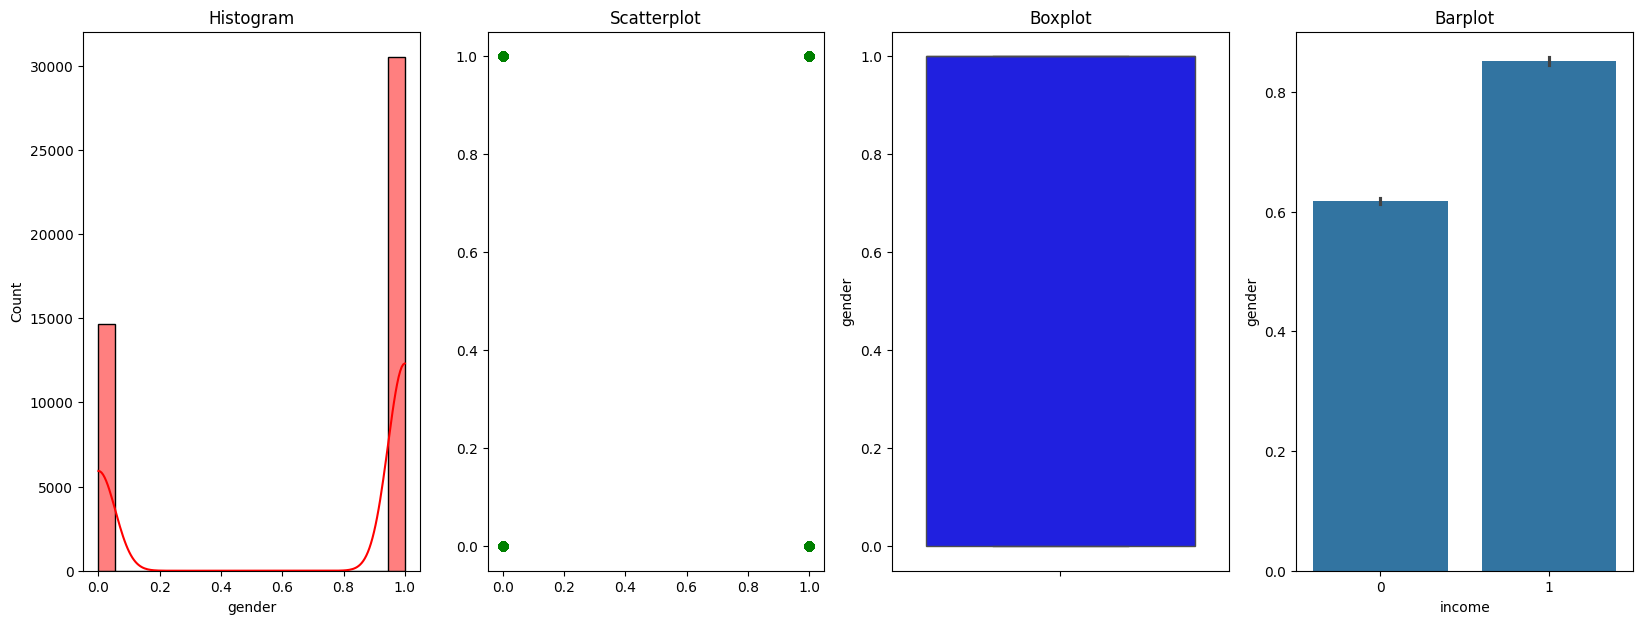

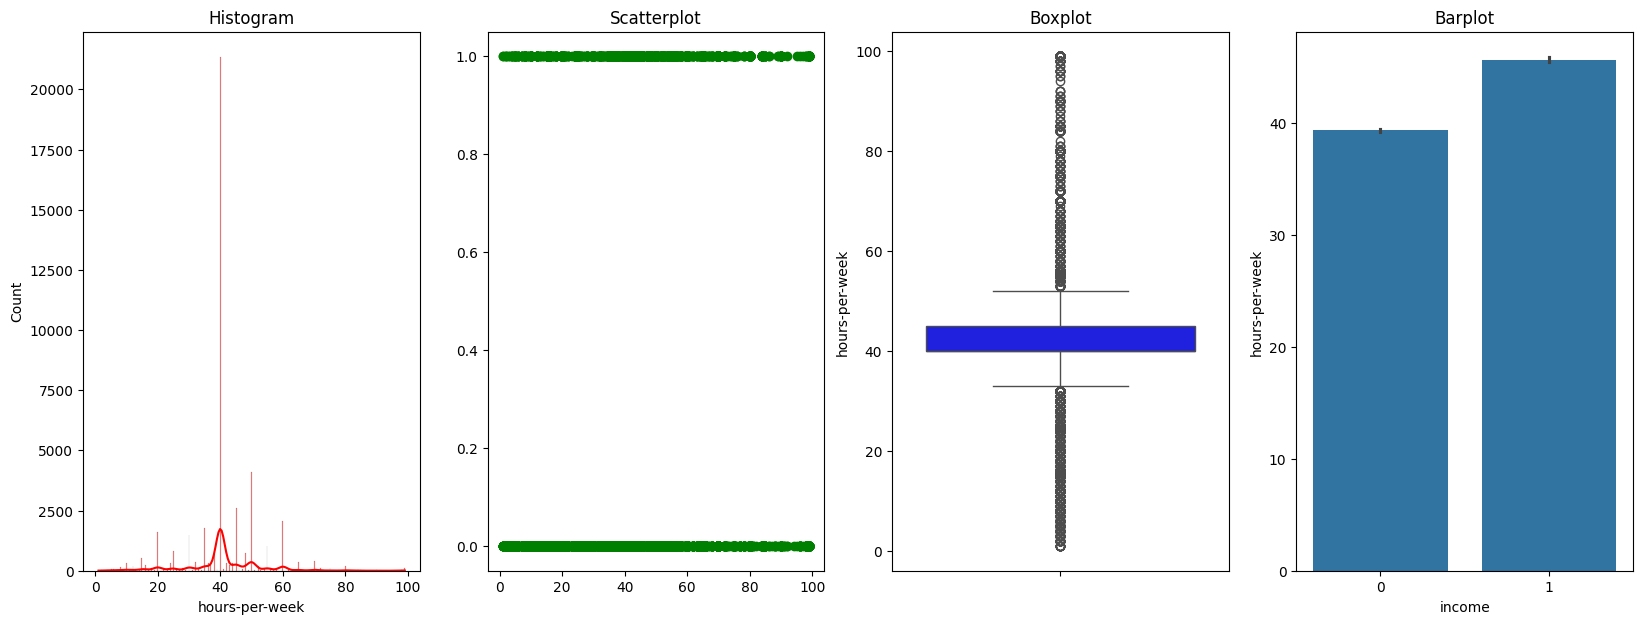

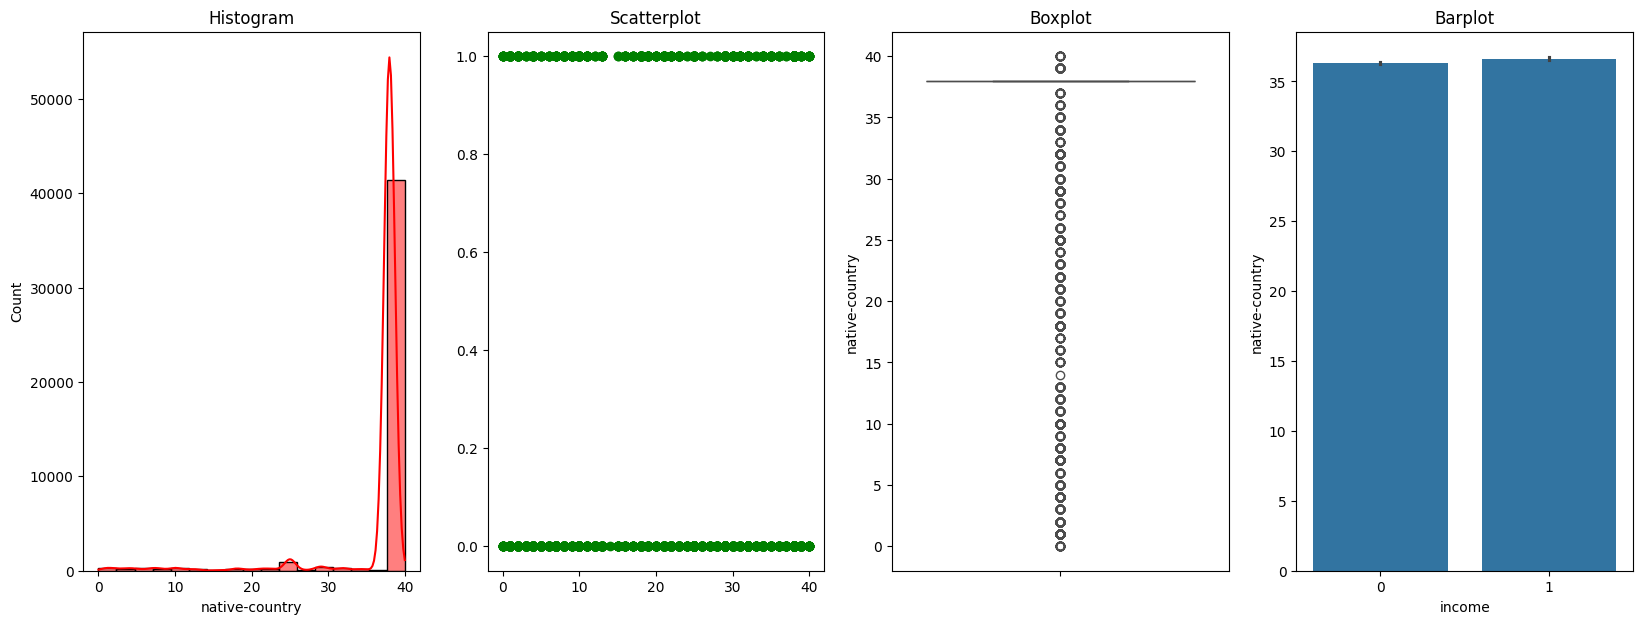

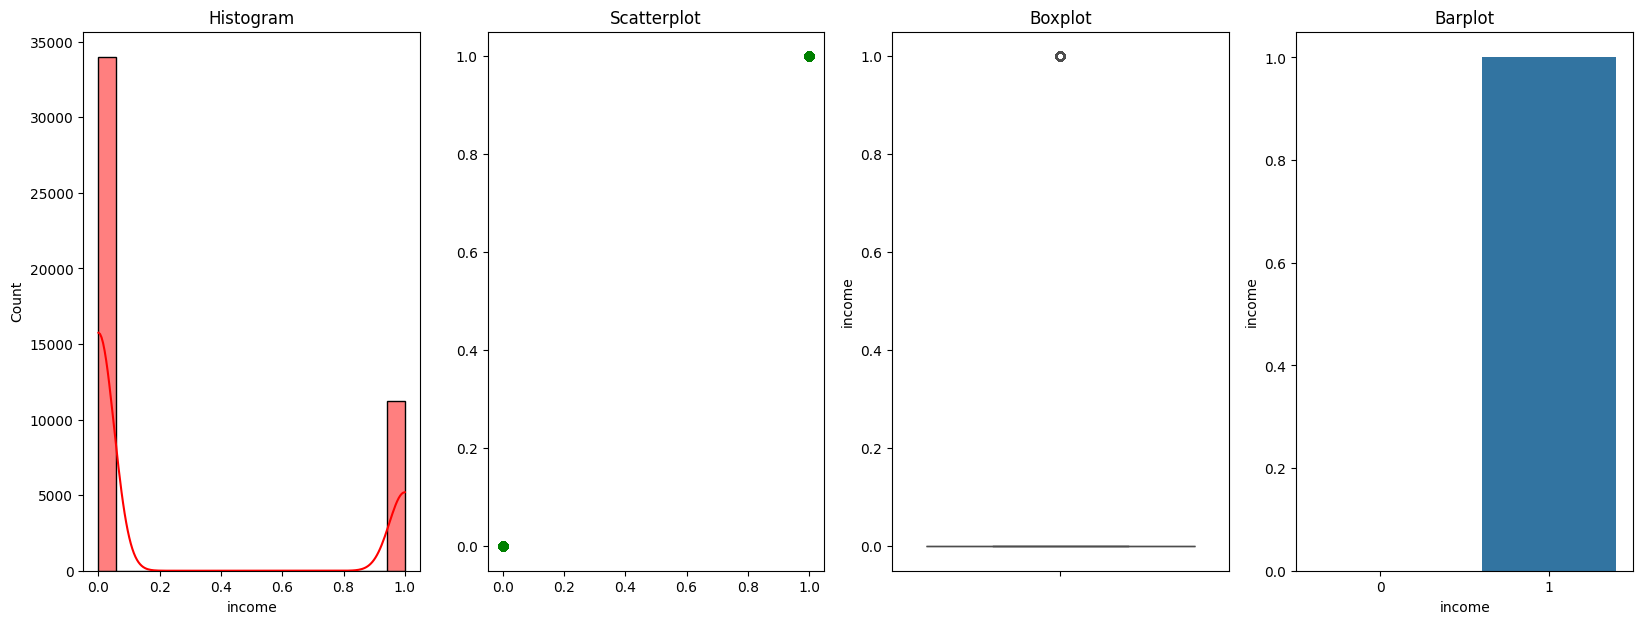

In [25]:
for col in df1:
    diagnostic_plots(df1,col,'income')

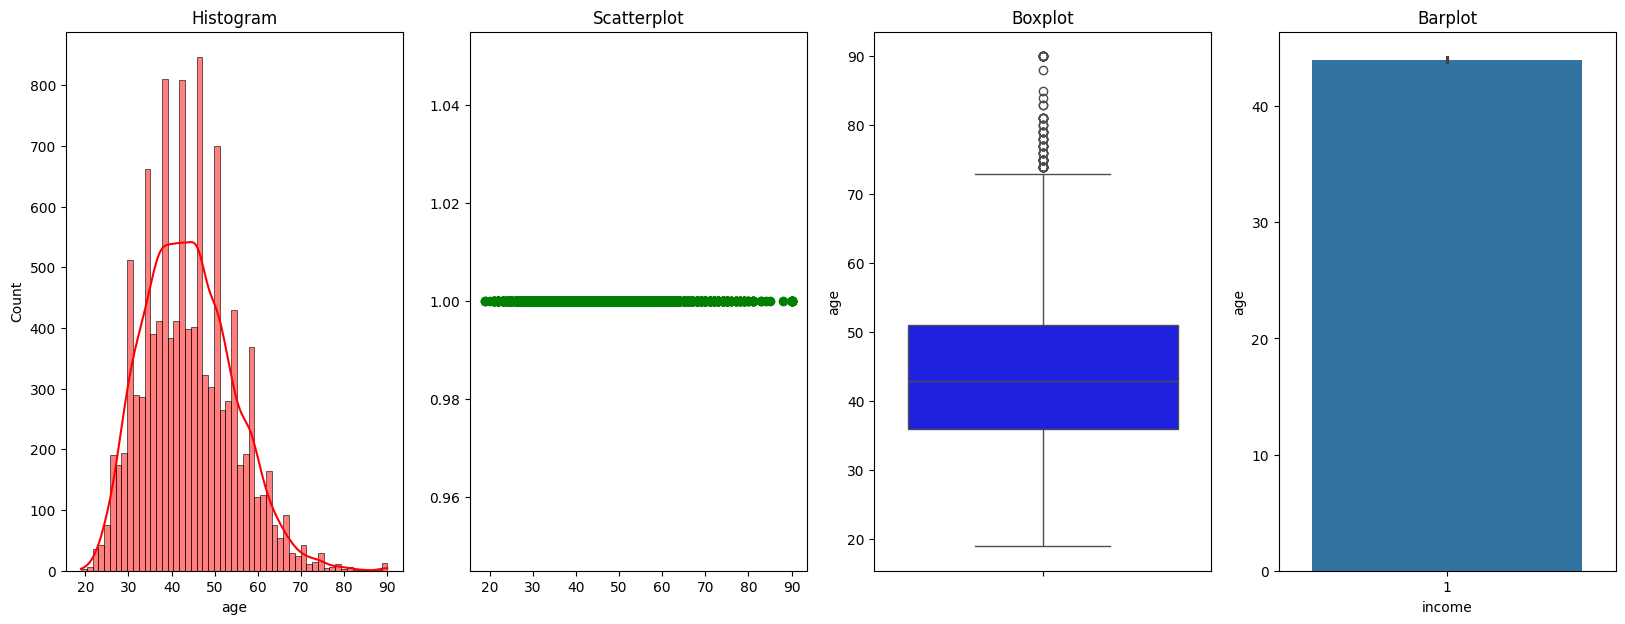

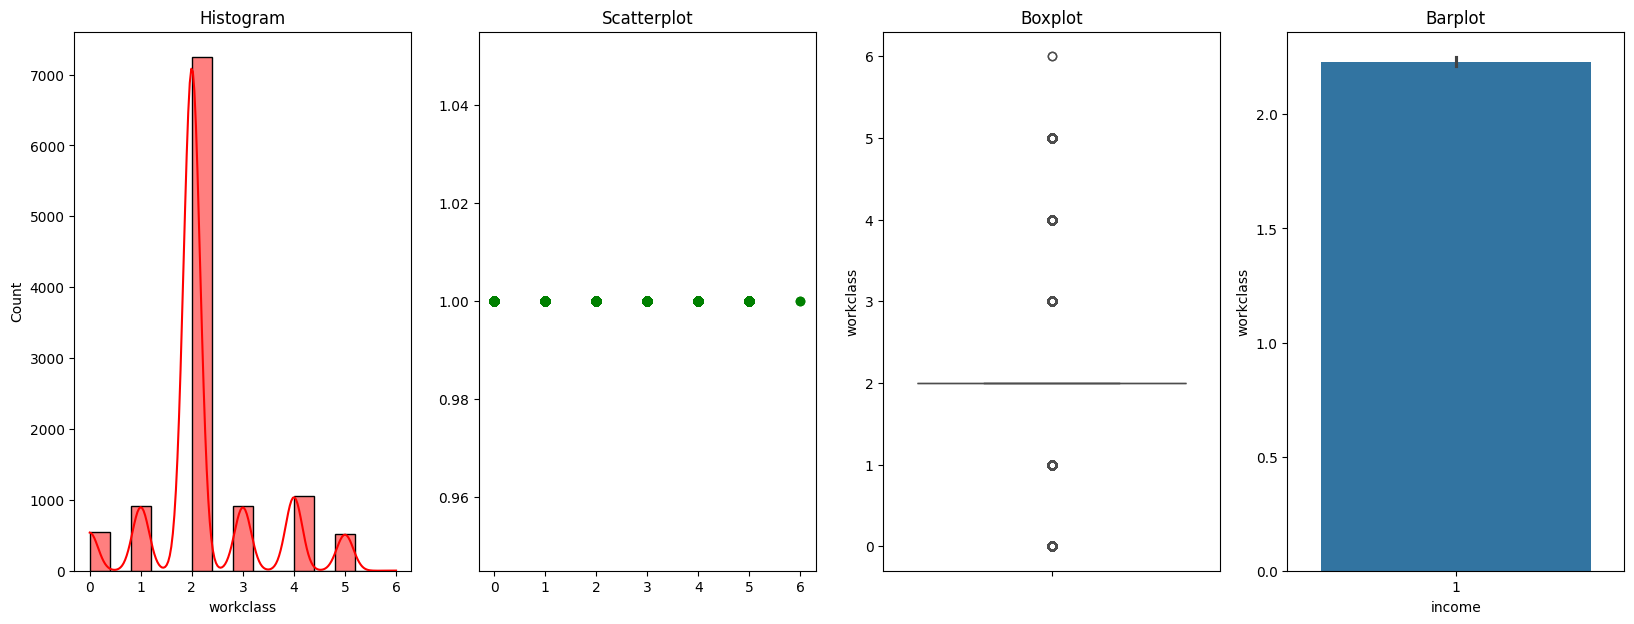

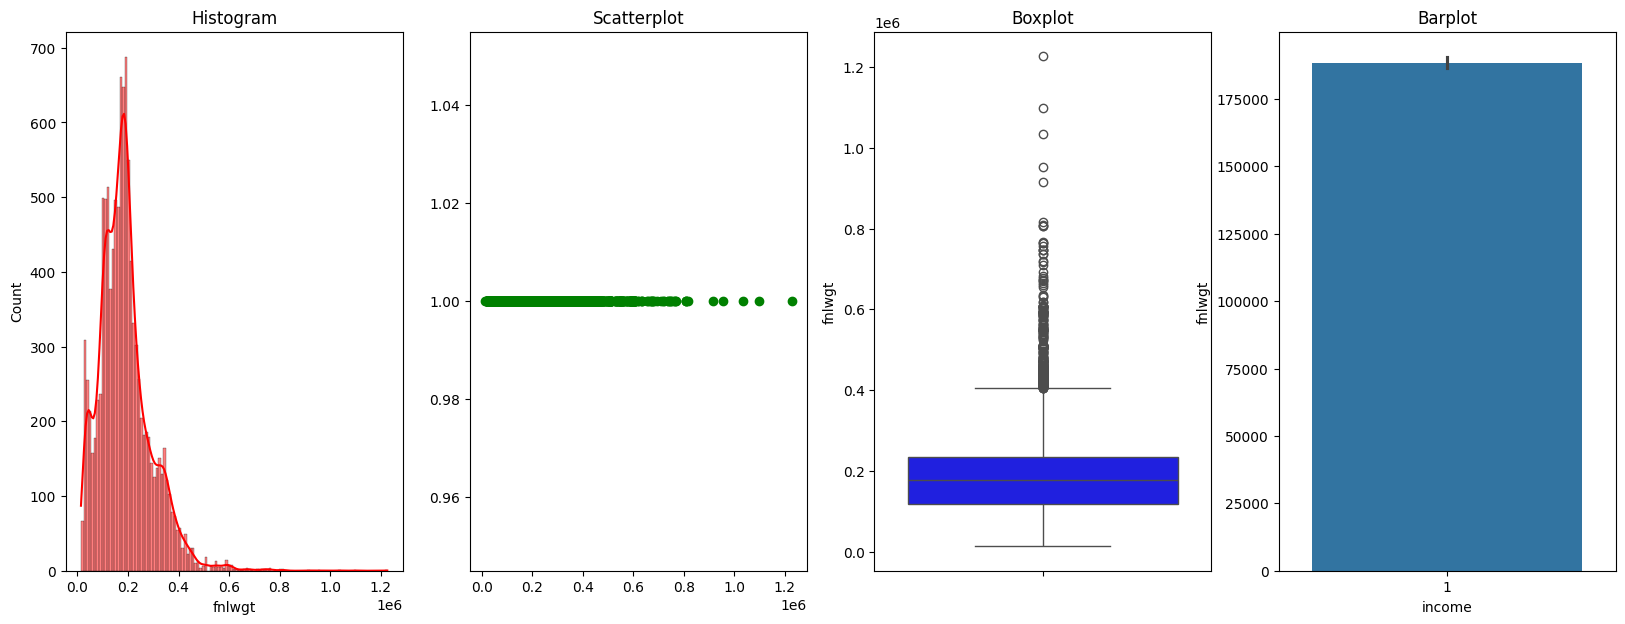

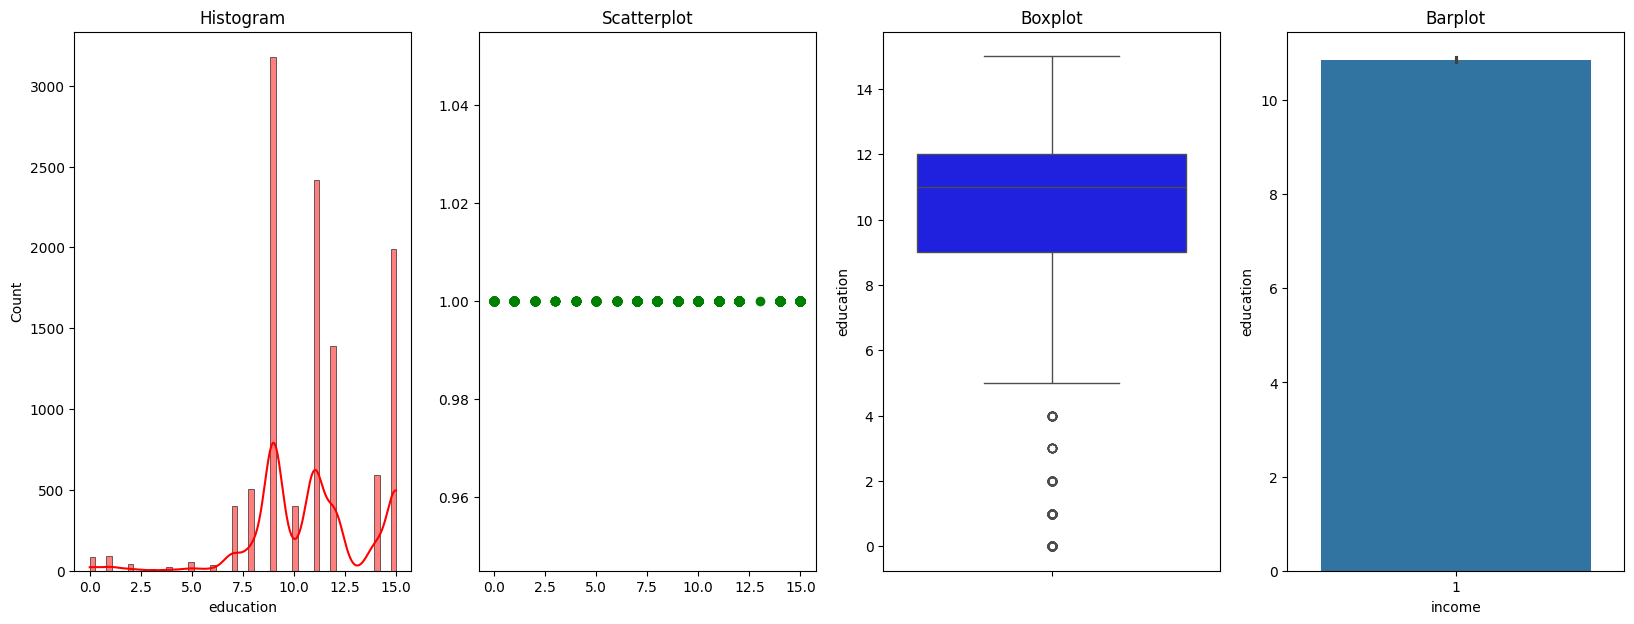

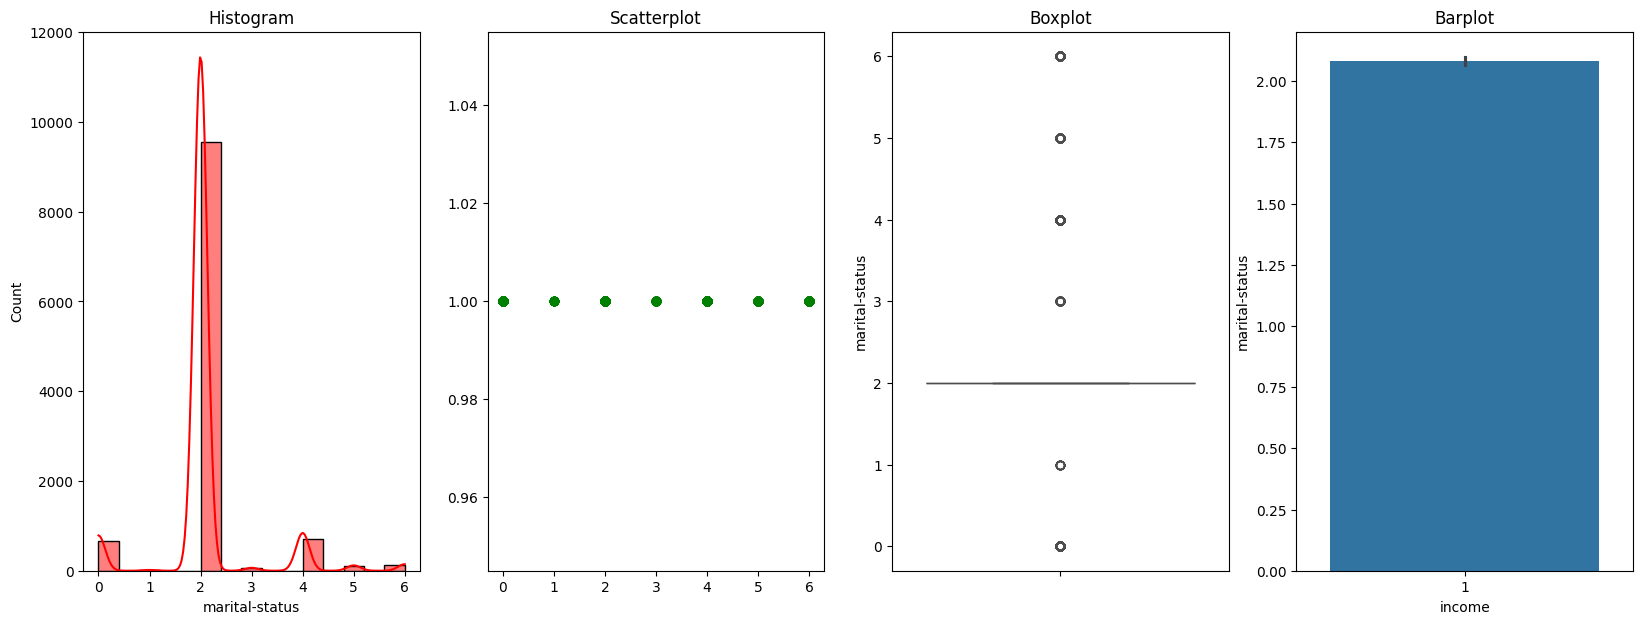

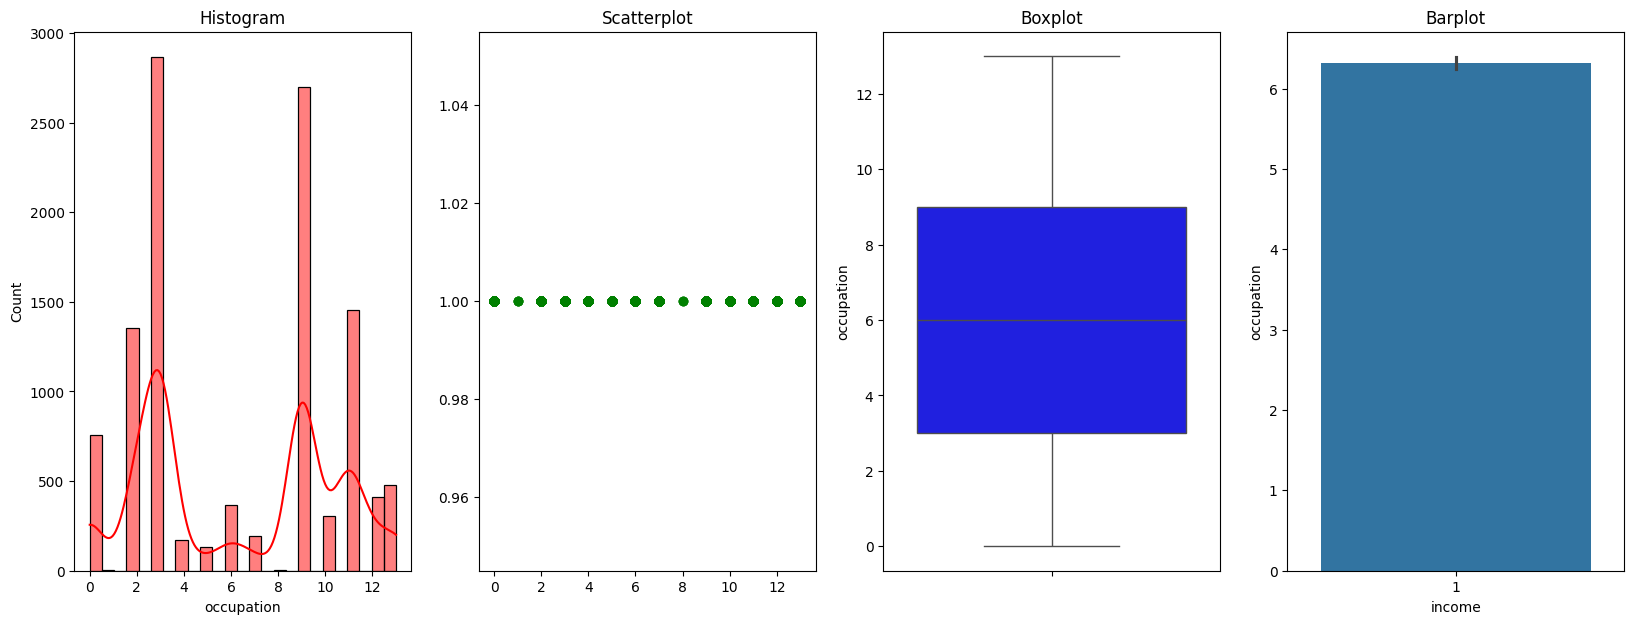

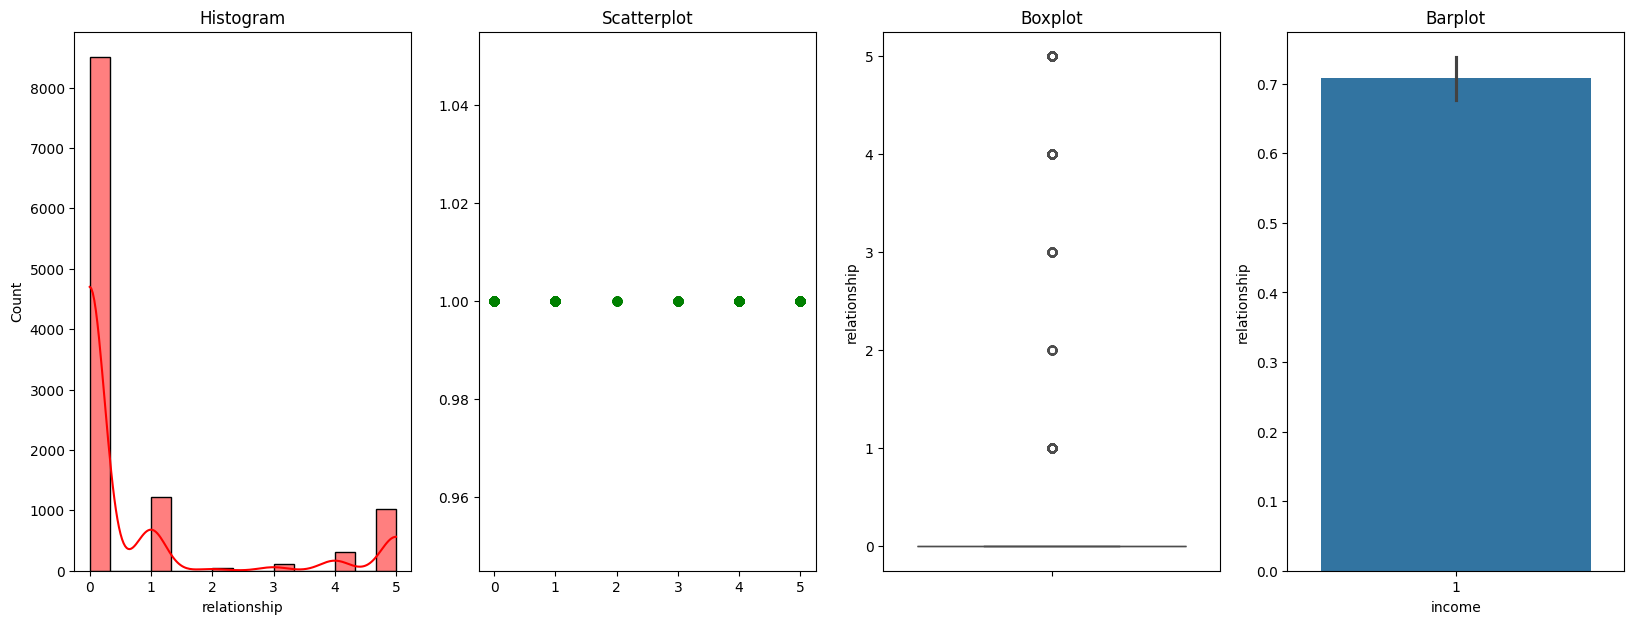

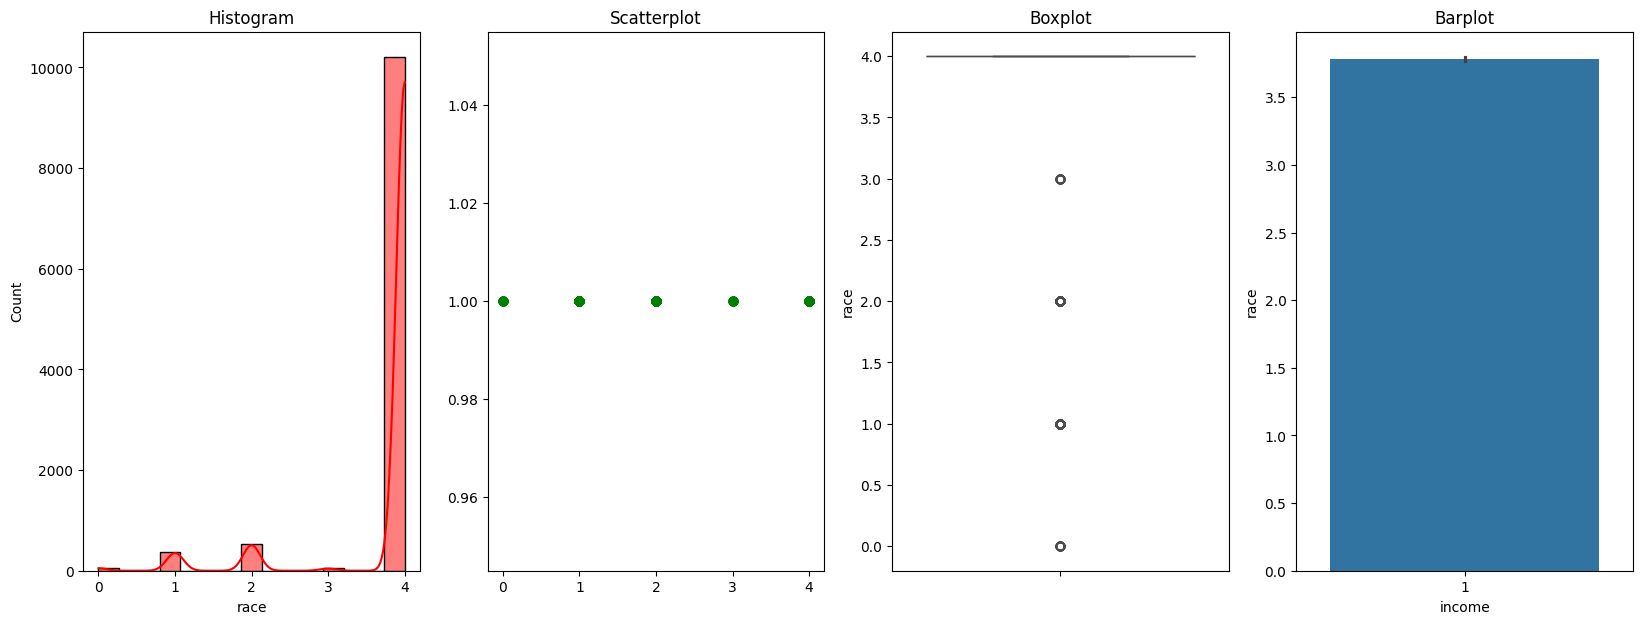

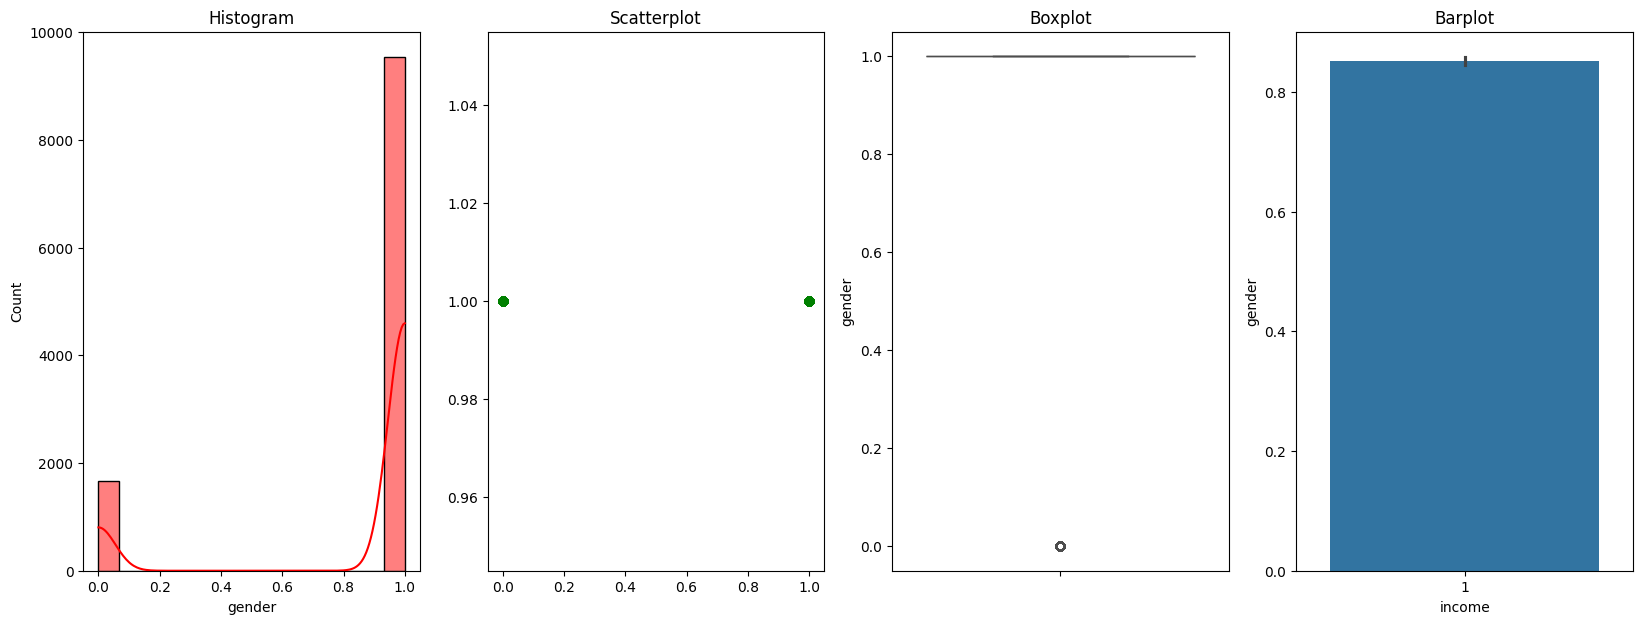

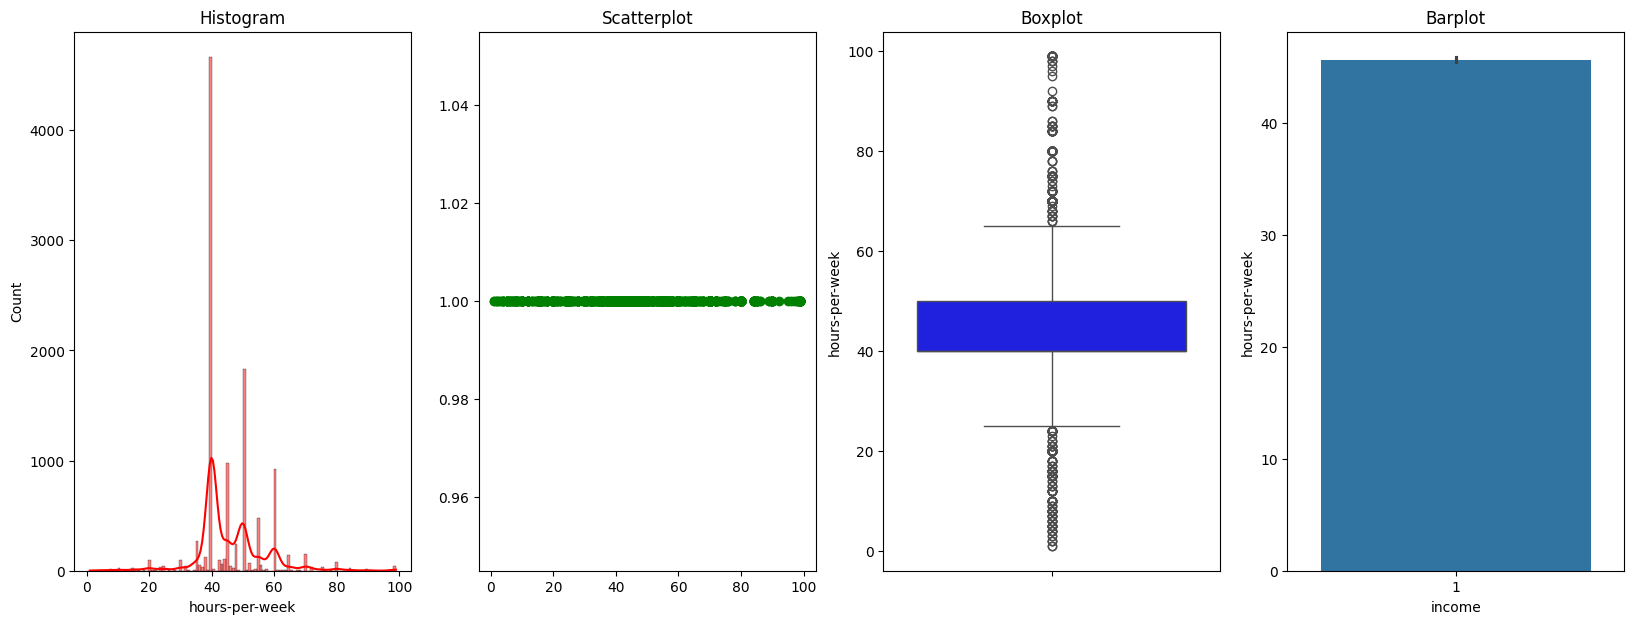

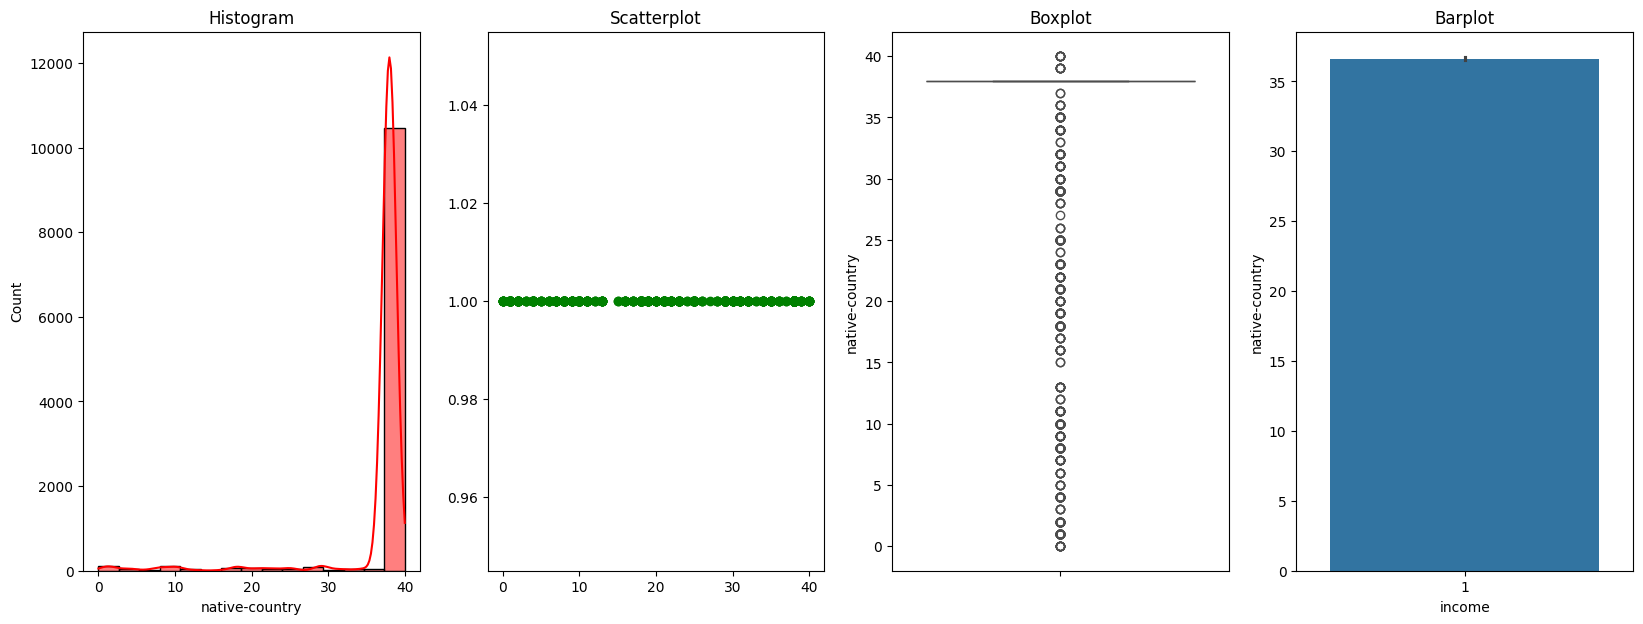

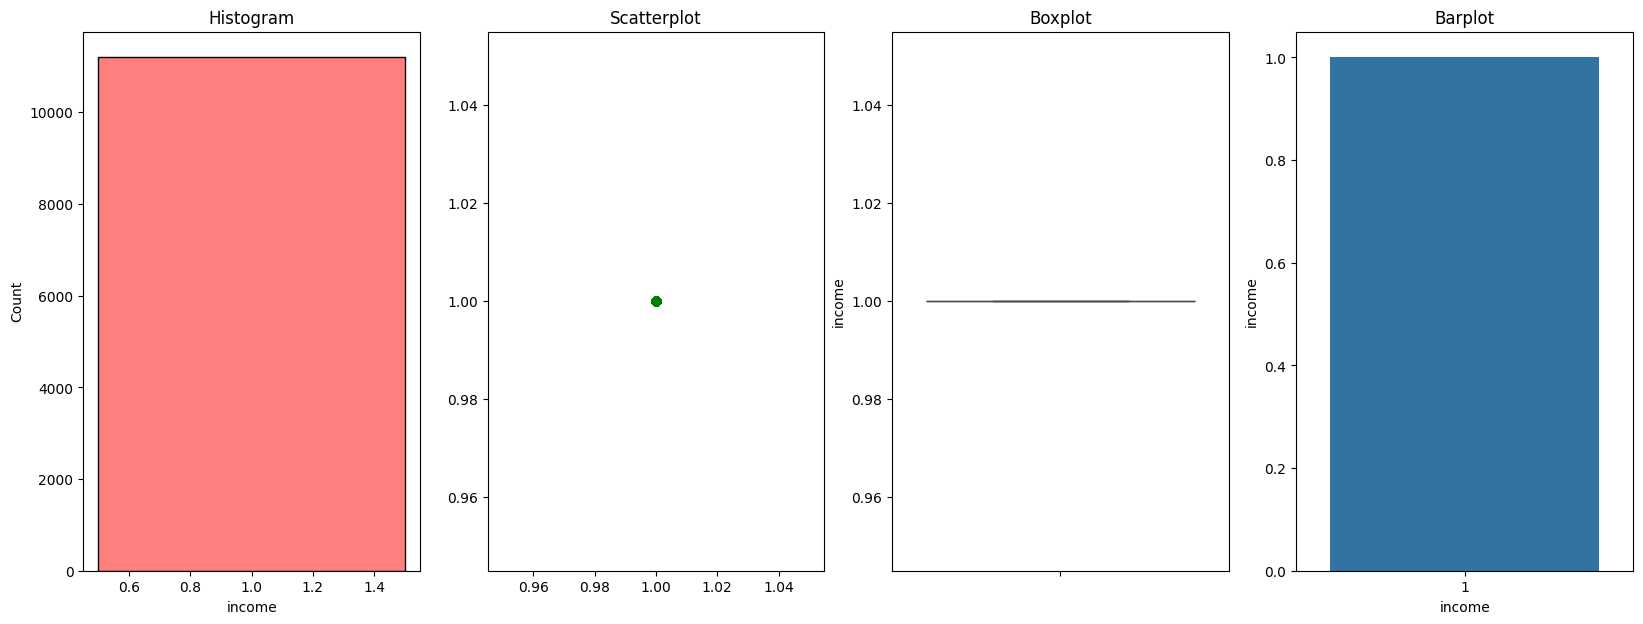

In [26]:
df_income_gt_50k = df1[df1['income'] == 1]
for col in df_income_gt_50k:
    diagnostic_plots(df_income_gt_50k,col,'income')

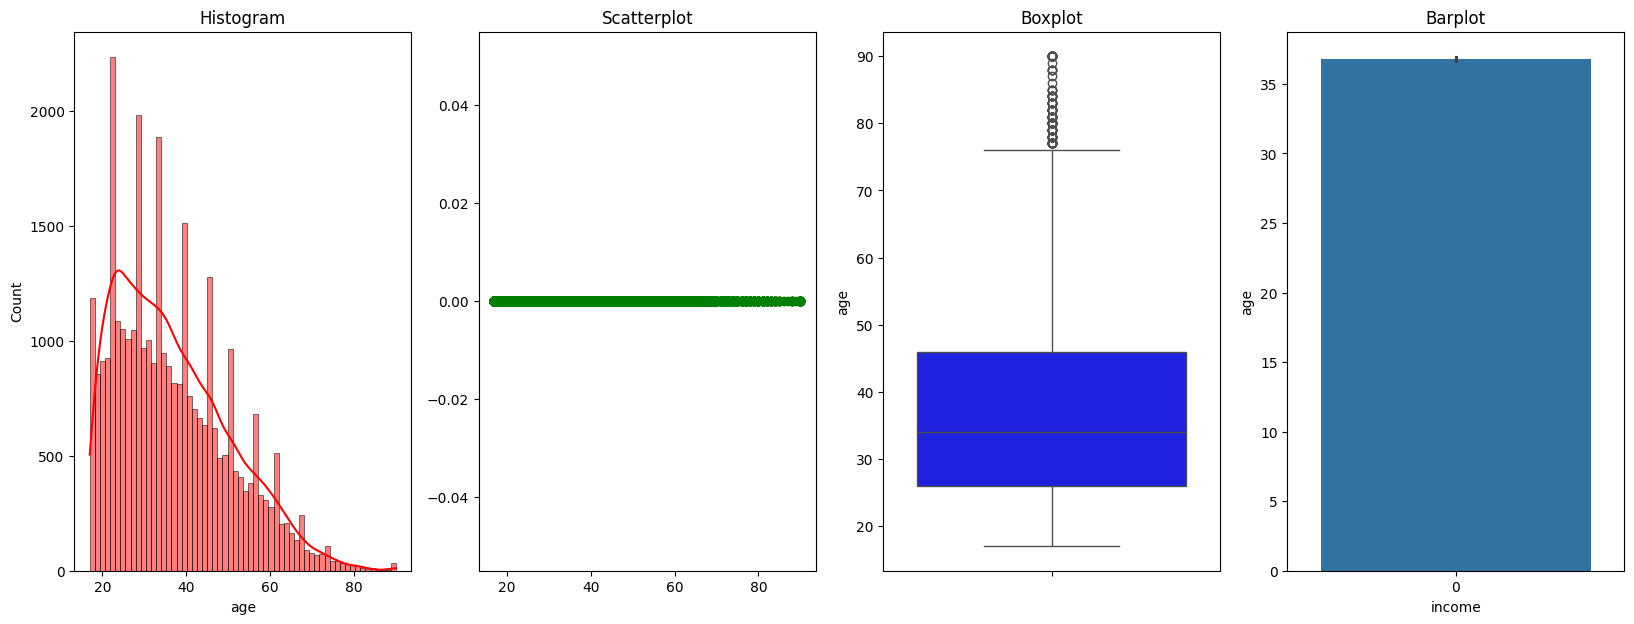

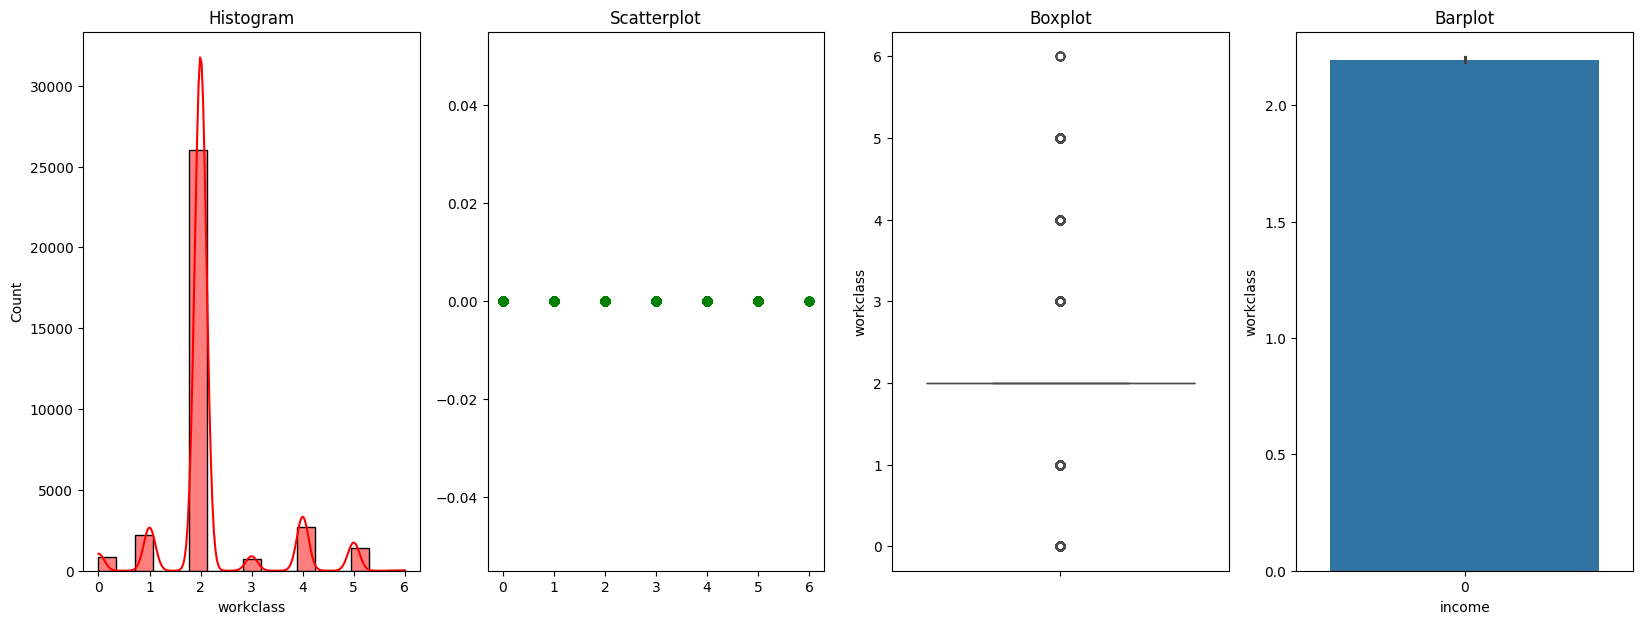

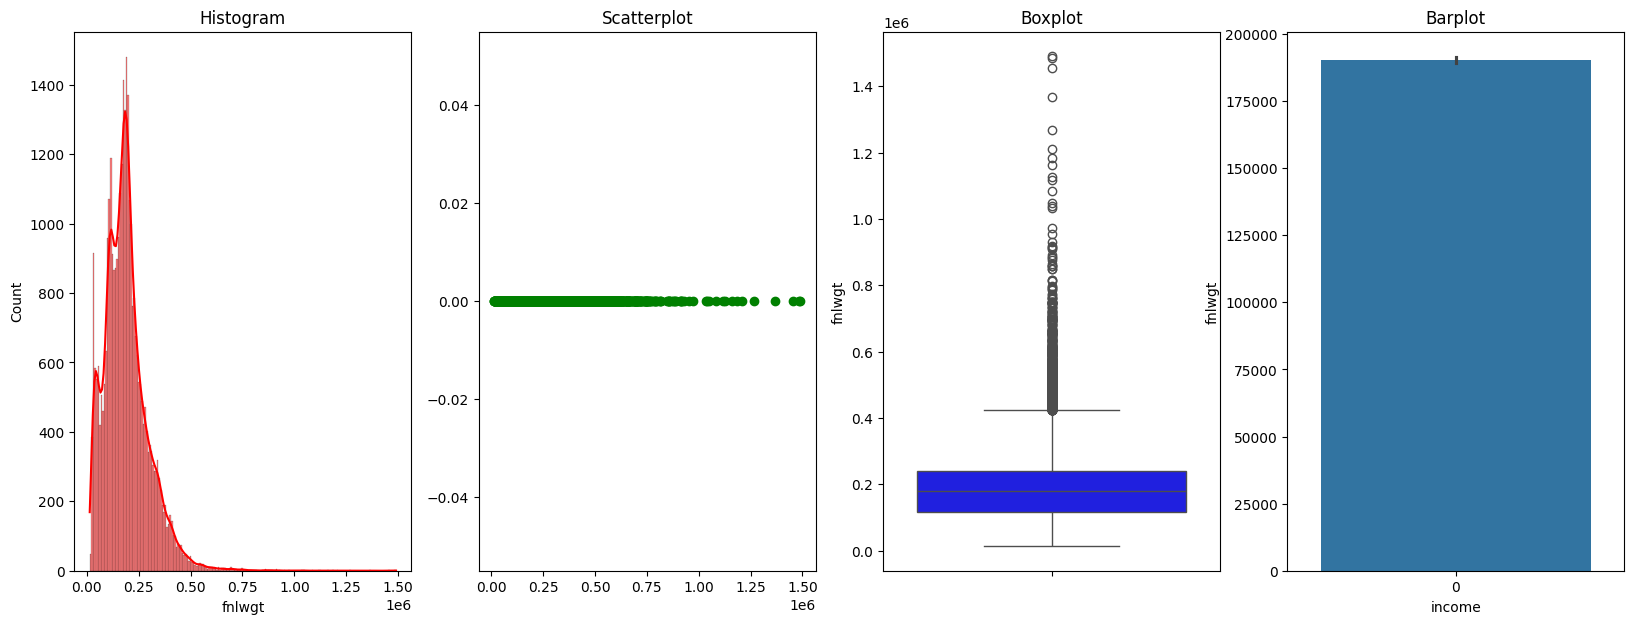

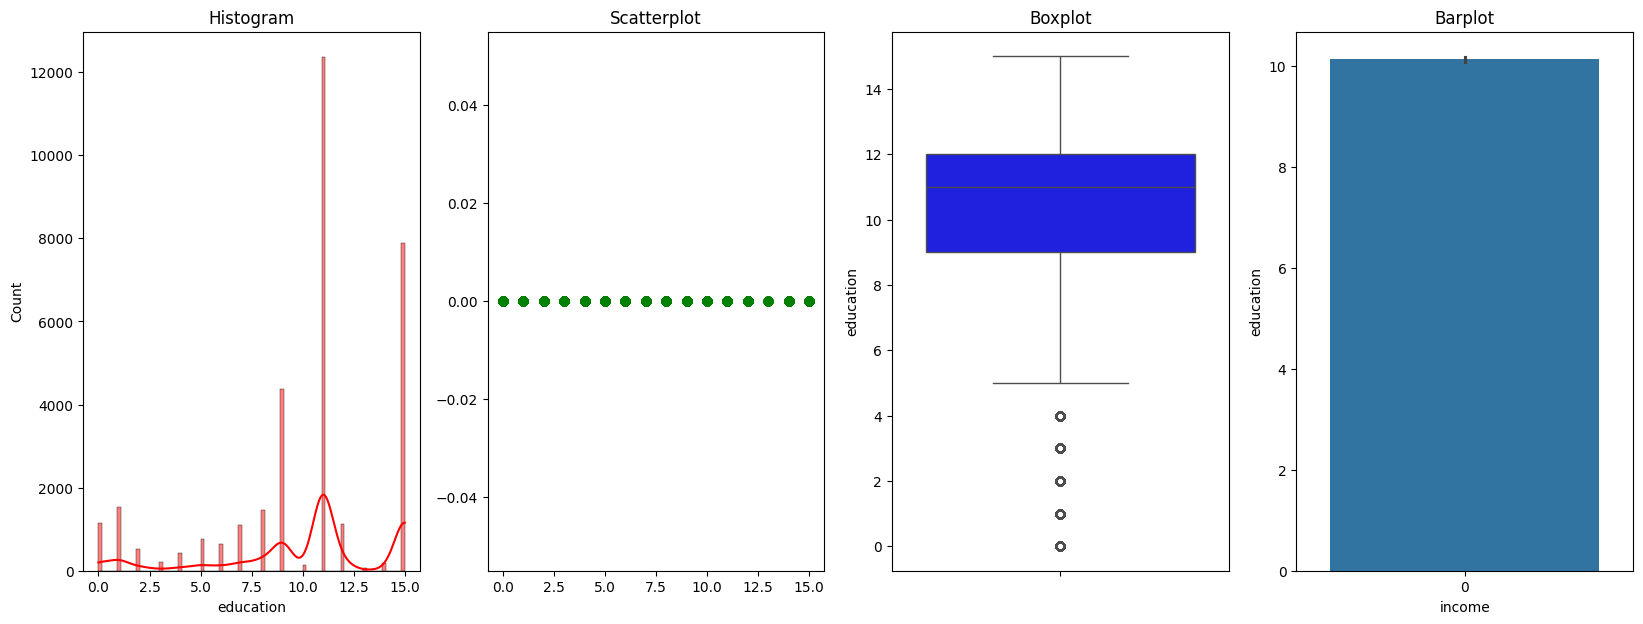

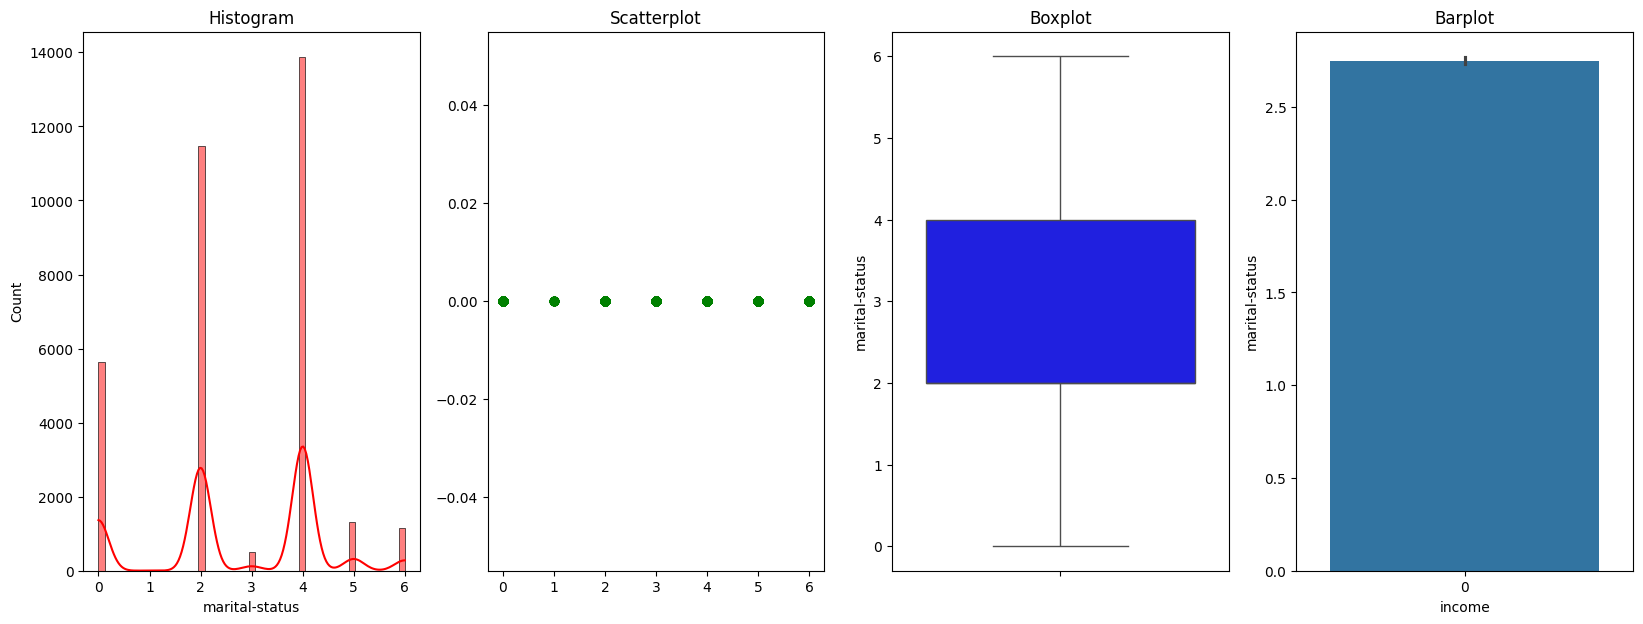

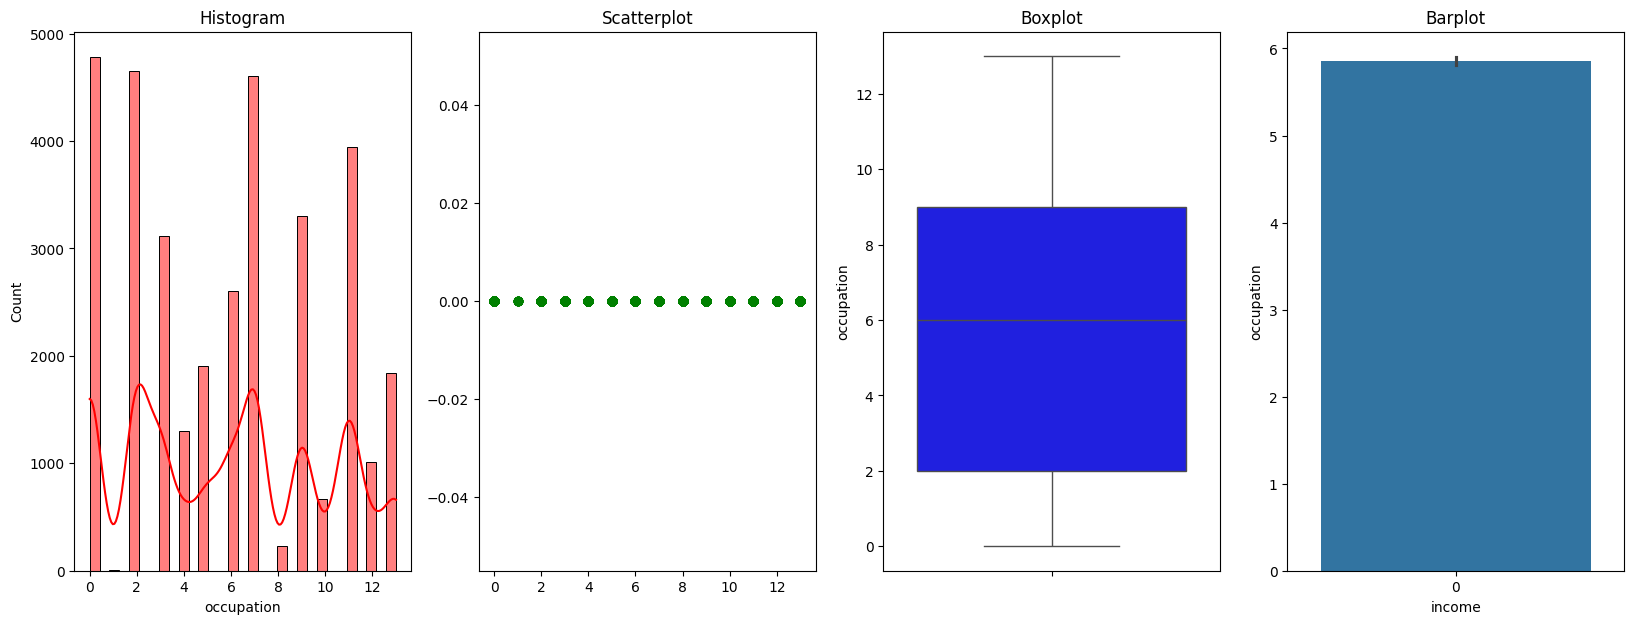

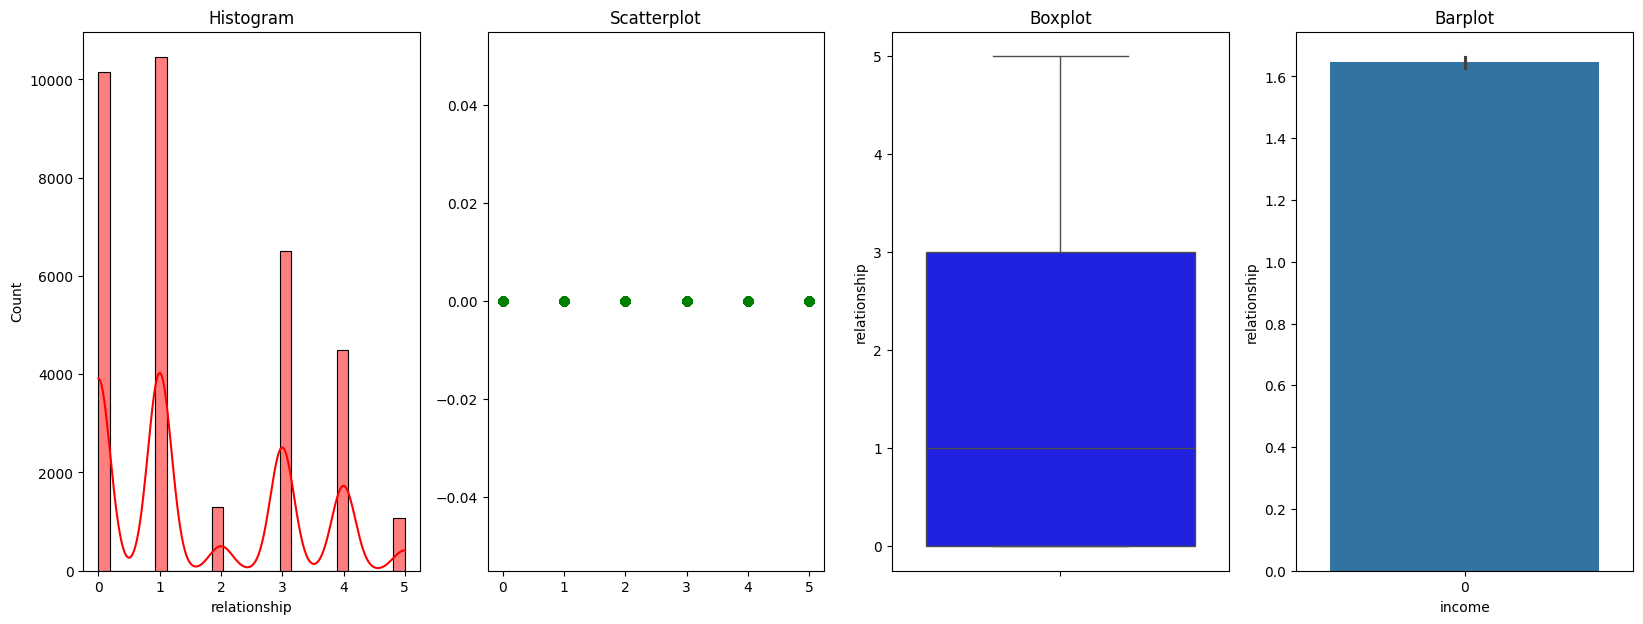

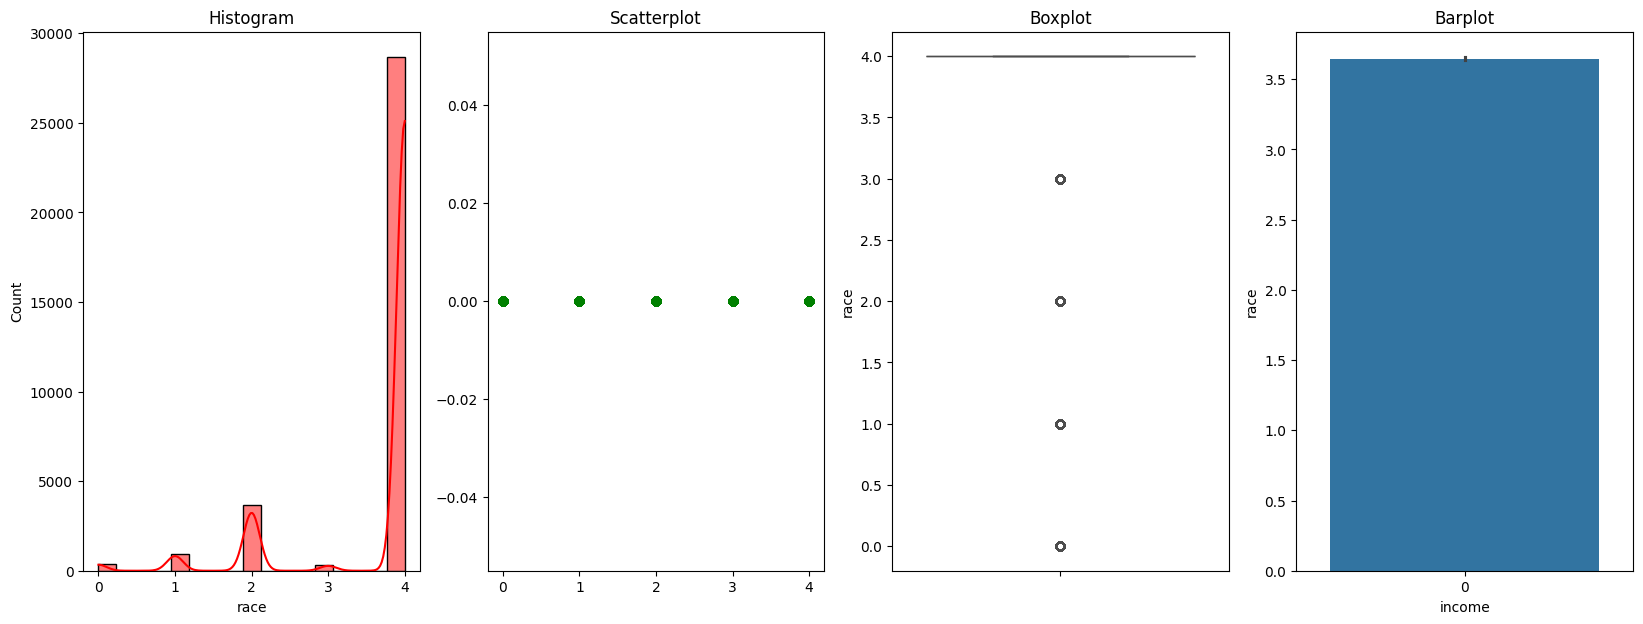

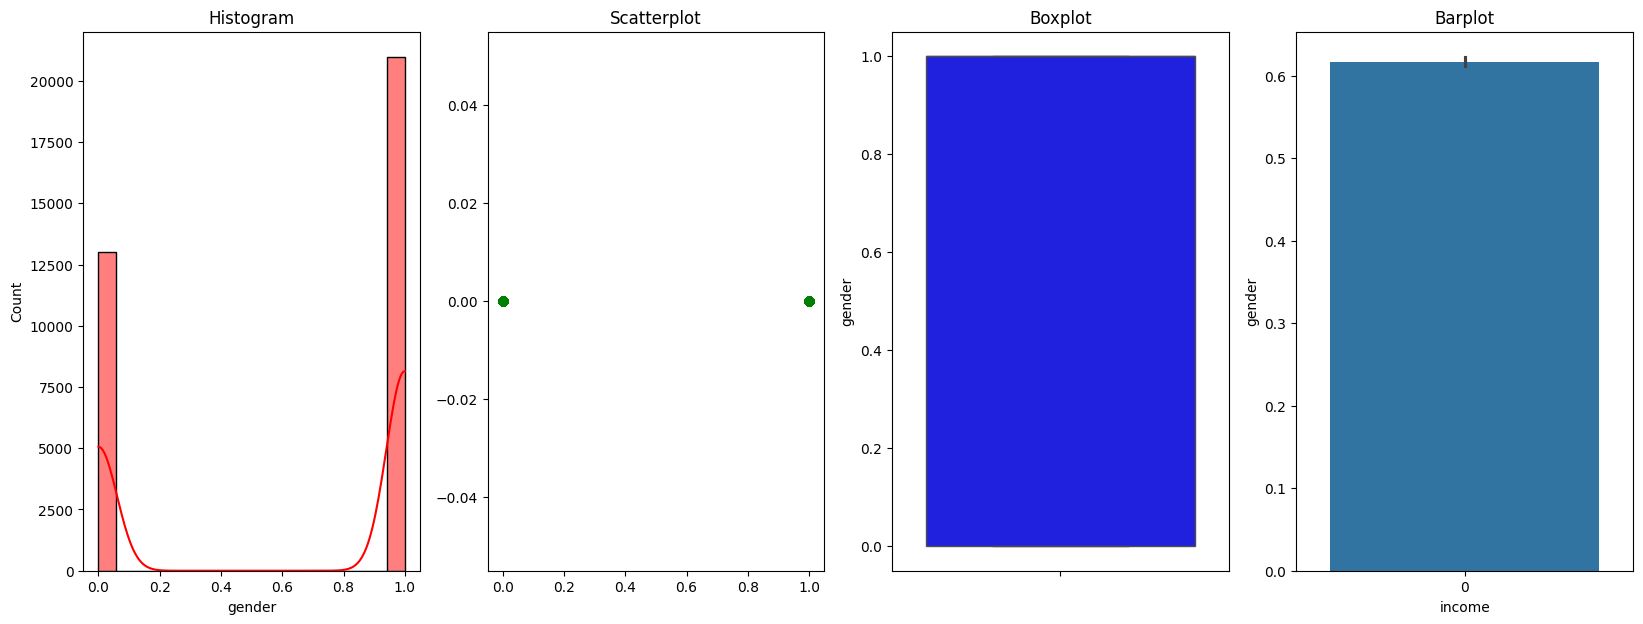

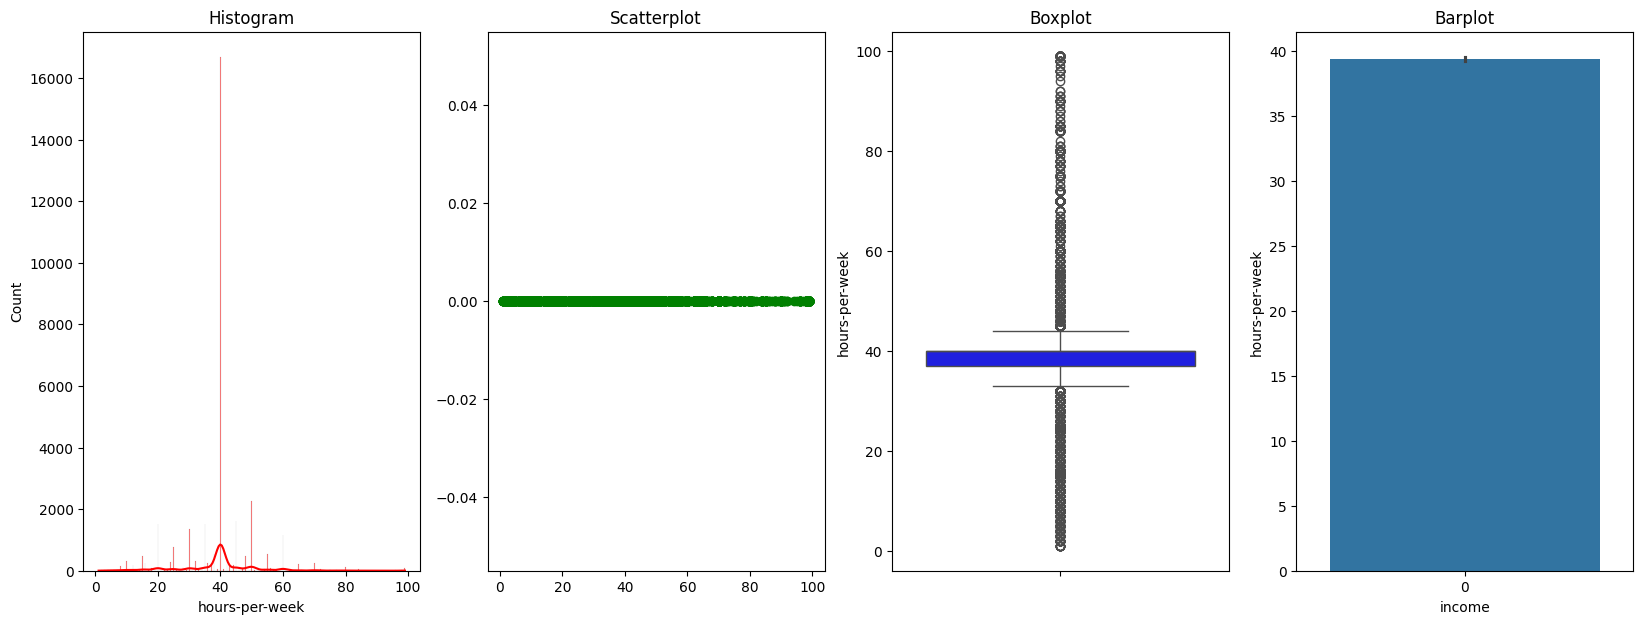

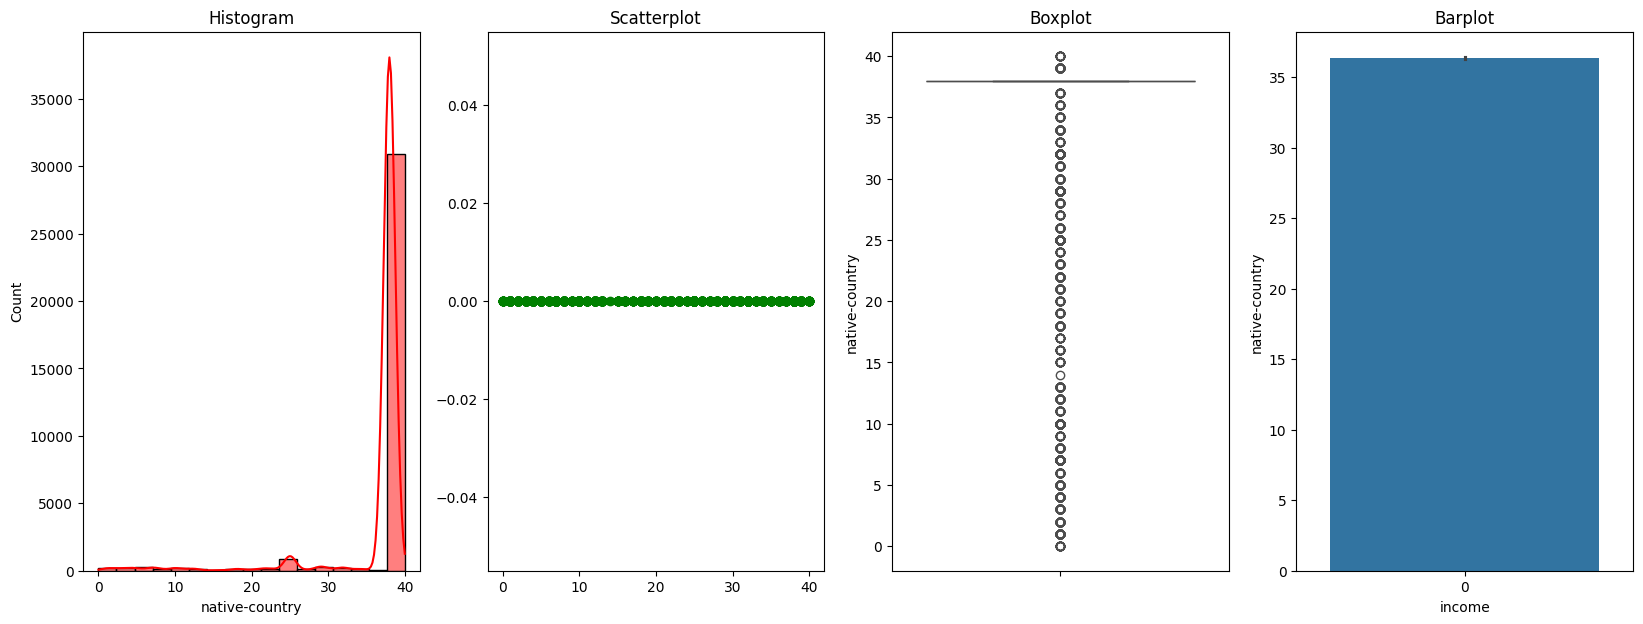

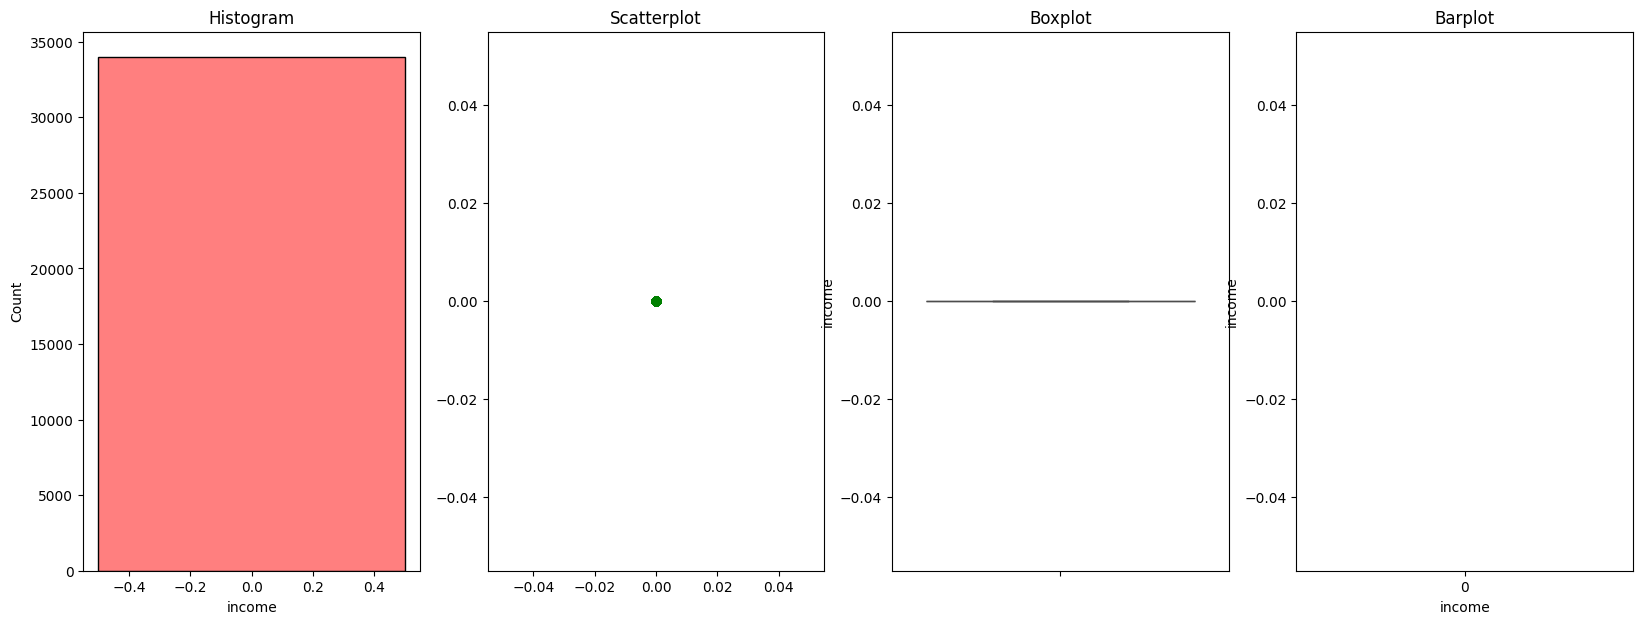

In [27]:
df_income_le_50k = df1[df1['income'] == 0]
for col in df_income_le_50k:
    diagnostic_plots(df_income_le_50k,col,'income')

# Model

In [28]:
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [29]:
# split Data
X = df1.drop(columns={"income"},axis=1)
y =df1["income"].values.reshape(-1,1) #target

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36133, 11)
y_train shape: (36133, 1)
X_test shape: (9034, 11)
y_test shape: (9034, 1)


### Scaling Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [32]:
info = pd.DataFrame(df1.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",df1.isna().sum(),True)
info.insert(2,"Duplicate",df1.duplicated().sum(),True)
info.insert(3,"Unique",df1.nunique(),True)
info.insert(4,"Min",df1.min(),True)
info.insert(5,"Max",df1.max(),True)
info.T

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0
IsNa,0,0,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,0,0
Unique,74,7,26741,16,7,14,6,5,2,96,41,2
Min,17,0,13492,0,0,0,0,0,0,1,0,0
Max,90,6,1490400,15,6,13,5,4,1,99,40,1


In [33]:
#Find Best K 
# K = 20
# error =[]
# accuracy=[]
# for i in range(1,K+1):
#     knn= KNeighborsClassifier(n_neighbors= i)
#     knn.fit(X_train,y_train)
#     y_pred =knn.predict(X_test)
#     error.append(1-metrics.accuracy_score(y_test,y_pred))
#     accuracy.append(metrics.accuracy_score(y_test,y_pred))


In [34]:

# plt.figure(figsize=(20, 7))
# plt.subplot(1, 2, 1)
# plt.plot(range(1,21),error,'r-',marker='o')
# plt.xlabel('Values of K')
# plt.ylabel('Error')
# plt.grid()
# plt.title('Error vs K')

# plt.subplot(1, 2, 2)
# plt.plot(range(1,21),accuracy,'r-',marker='o')
# plt.xlabel('Values of K')
# plt.ylabel('accuracy')
# plt.grid()
# plt.title('accuracy vs K')

In [35]:
# K=20
# clf= KNeighborsClassifier(K)
# clf.fit(X_train,y_train)
# y_pred =clf.predict(X_test)
# print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

In [36]:
# Find Best K 
# training_acc = []
# test_acc = []

# # try KNN for different K nearest neighbor from 1 to 30
# neighbors_setting = range(1,25)
# for n_neighbors in neighbors_setting:
#     knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
#     knn.fit(X_train,y_train.ravel())
#     training_acc.append(knn.score(X_train,y_train))
#     test_acc.append(knn.score(X_test,y_test))

# plt.plot(neighbors_setting,training_acc,label='Accuracy of the training set')
# plt.plot(neighbors_setting,test_acc,label='Accuracy of the test set')
# plt.ylabel('Accuracy')
# plt.xlabel('Number of Neighbors')
# plt.grid()
# plt.legend()
# plt.show()

In [37]:
#Find Best K 

# parameters = {"n_neighbors":range(1,25)}
# grid_kn=GridSearchCV(estimator=knn,#model
#                      param_grid=parameters, #range of K
#                     scoring='accuracy',# Strategy to evaluate the performance of the cross-validation model on the test set.
#                     cv= 10, # Cross-validation generator
#                     verbose= 1, #Time to calculate
#                     n_jobs= -1 #Help to cpu
#                     )
# grid_kn.fit(X_train,y_train.ravel())

In [38]:
# grid_kn.best_params_

In [39]:
# K=grid_kn.best_params_['n_neighbors']
model=KNeighborsClassifier(23)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8192384325880009


In [40]:
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Female', 1: 'Male'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-child', 4: 'Unmarried', 5: 'Wife'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Amer-Indian-Eskimo', 1: 'Asian-Pac-Islander', 2: 'Black', 3: 'Other', 4: 'White'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: 'Cambodia', 1: 'Canada', 2: 'China', 3: 'Columbia', 4: 'Cuba', 5: 'Dominican-Republic', 6: 'Ecuador', 7: 'El-Salvador', 8: 'England', 9: 'France', 10: 'Germany', 11: 'Greece', 12: 'Guatemala', 13: 'Haiti', 14: 'Holand-Netherlands', 15: 'Honduras', 16: 'Hong', 17: 'Hungary', 18: 'India', 19: 'Iran', 20: 'Ireland', 21: 'Italy', 22: 'Jamaica', 23: 'Japan', 24: 'Laos', 25: 'Mexico', 26: 'Nicaragua', 27: 'Outlying-US(Guam-USVI-etc)', 28: 'Peru', 29: 'Philippines', 30: 'Poland', 31: 'Portugal', 32: 'Puerto-Rico', 33: 'Scotland', 34: 'South', 35: 'Taiwan', 36: 'Thailand', 37: 'Trinadad&Tobago', 38: 'United-States', 39: 'Vietnam', 40: 'Yugoslavia'}
# Mapping von encodierten Labels zu ursprünglichen Strings:
# {0: '<=50K', 1: '>50K'}
#	28	1	336951	7	2	10	0	4	1	40	38	1
junge_prime_hat_sich_bayern_inter_ausgesucht = pd.DataFrame({
    'age': [42],  # Alter
    'workclass': [2],  # Kodiert wie in den Trainingsdaten
    'fnlwgt': [220000],  # Gewichtungsfaktor
    'education': [9],  # Kodiert wie in den Trainingsdaten
    'marital-status': [2],  # Kodiert wie in den Trainingsdaten
    'occupation': [3],  # Kodiert wie in den Trainingsdaten
    'relationship': [0],  # Kodiert wie in den Trainingsdaten
    'race': [4],  # Kodiert wie in den Trainingsdaten
    'gender': [1],  # Kodiert wie in den Trainingsdaten
    'hours-per-week': [40],  # Arbeitsstunden pro Woche
    'native-country': [38]  # Kodiert wie in den Trainingsdaten
})

# Skalieren der Eingabedaten
person_scaled = st.transform(junge_prime_hat_sich_bayern_inter_ausgesucht)

# Vorhersage mit dem Modell
prediction = model.predict(person_scaled)
print("Vorhersage für die neue Person:", prediction)

Vorhersage für die neue Person: [1]


In [41]:
from sklearn.neighbors import NearestNeighbors

# Beispiel-Datenpunkt (kann angepasst werden)
example_point = junge_prime_hat_sich_bayern_inter_ausgesucht

# Skalieren des Datenpunkts
example_point_scaled = st.transform(example_point)

# NearestNeighbors-Modell initialisieren
nn_model = NearestNeighbors(n_neighbors=23)  # Anzahl der Nachbarn
nn_model.fit(X_train)

# Nächste Nachbarn finden
distances, indices = model.kneighbors(example_point_scaled)

# Ergebnisse anzeigen
print("Distanzen zu den nächsten Nachbarn:", distances)
print("Indizes der nächsten Nachbarn:", indices)

# Merkmale und Labels der nächsten Nachbarn anzeigen
nearest_neighbors = X_train[indices[0]]
nearest_labels = y_train[indices[0]]

print("vor backtrafo scaling:")
debug_df = pd.DataFrame(nearest_neighbors, columns=X.columns)
debug_df

Distanzen zu den nächsten Nachbarn: [[0.00753208 0.01734151 0.02006409 0.0317645  0.03338719 0.03910896
  0.04135332 0.04148888 0.04167788 0.04196273 0.04235823 0.04427616
  0.04655758 0.04728728 0.04843533 0.048993   0.04940154 0.05225567
  0.05599659 0.05840192 0.05895667 0.06098441 0.06185613]]
Indizes der nächsten Nachbarn: [[26159  7409  1605  3328 32435 35127 28324 25928  2322  7654 21917 18337
   4603 22551  5195 27485 14881 32650 29216  7898  6766 23447 20210]]
vor backtrafo scaling:


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,0.342466,0.333333,0.168214,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
1,0.342466,0.333333,0.143341,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
2,0.342466,0.333333,0.140618,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
3,0.369863,0.333333,0.144608,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
4,0.342466,0.333333,0.127295,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
5,0.328767,0.333333,0.197314,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
6,0.383562,0.333333,0.165289,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
7,0.383562,0.333333,0.154985,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
8,0.383562,0.333333,0.153741,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95
9,0.328767,0.333333,0.121018,0.6,0.333333,0.230769,0.0,1.0,1.0,0.397959,0.95


In [42]:
nearest_neighbors = st.inverse_transform(nearest_neighbors)  # Rücktransformation der Merkmale
nearest_labels = label_encoder_income.inverse_transform(nearest_labels.ravel())  # Rücktransformation der Labels

# round so no float issues exist
nearest_neighbors = np.round(nearest_neighbors).astype(int)

print("nach backtrafo scaling:")
debug_df = pd.DataFrame(nearest_neighbors, columns=X.columns)
debug_df

nach backtrafo scaling:


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,42,2,229408,9,2,3,0,4,1,40,38
1,42,2,198340,9,2,3,0,4,1,40,38
2,42,2,194939,9,2,3,0,4,1,40,38
3,44,2,199923,9,2,3,0,4,1,40,38
4,42,2,178298,9,2,3,0,4,1,40,38
5,41,2,265754,9,2,3,0,4,1,40,38
6,45,2,225754,9,2,3,0,4,1,40,38
7,45,2,212884,9,2,3,0,4,1,40,38
8,45,2,211331,9,2,3,0,4,1,40,38
9,41,2,170458,9,2,3,0,4,1,40,38


In [43]:
# Rücktransformation der kodierten Werte in die ursprünglichen Werte
nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=X.columns)

# Mapping für die Rücktransformation
mappings = {
    'gender' : {i: label for i, label in enumerate(label_encoder_gender.classes_)},
    'workclass': {i: label for i, label in enumerate(label_encoder_workclass.classes_)},
    'education': {i: label for i, label in enumerate(label_encoder_education.classes_)},
    'marital-status': {i: label for i, label in enumerate(label_encoder_marital_status.classes_)},
    'occupation': {i: label for i, label in enumerate(label_encoder_occupation.classes_)},
    'relationship': {i: label for i, label in enumerate(label_encoder_relationship.classes_)},
    'race': {i: label for i, label in enumerate(label_encoder_race.classes_)},
    'native-country': {i: label for i, label in enumerate(label_encoder_native_country.classes_)}
}

print("Mappings für die Rücktransformation:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")

for column, mapping in mappings.items():
    nearest_neighbors_df[column] = nearest_neighbors_df[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))

nearest_neighbors_df['income'] = nearest_labels  # Hinzufügen der Labels

# mapping = {encoded: original for encoded, original in enumerate(label_encoder_relationship.classes_)}
# print("Mapping von encodierten Labels zu ursprünglichen Strings:")
# print(mapping)

# Ausgabe der tatsächlichen Werte
print("Tatsächliche Werte der nächsten Nachbarn:")
nearest_neighbors_df

Mappings für die Rücktransformation:
gender: {0: 'Female', 1: 'Male'}
workclass: {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
education: {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
marital-status: {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
occupation: {0: 'Adm-clerical', 1: 'Armed-Forces', 2: 'Craft-repair', 3: 'Exec-managerial', 4: 'Farming-fishing', 5: 'Handlers-cleaners', 6: 'Machine-op-inspct', 7: 'Other-service', 8: 'Priv-house-serv', 9: 'Prof-specialty', 10: 'Protective-serv', 11: 'Sales', 12: 'Tech-support', 13: 'Transport-moving'}
relationship: {0: 'Husband', 1: 'Not-in-family', 2: 'Other-relative', 3: 'Own-chi

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,42,Private,229408,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
1,42,Private,198340,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K
2,42,Private,194939,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
3,44,Private,199923,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
4,42,Private,178298,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,<=50K
5,41,Private,265754,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
6,45,Private,225754,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
7,45,Private,212884,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
8,45,Private,211331,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
9,41,Private,170458,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


AttributeError: 'numpy.ndarray' object has no attribute 'iterrows'

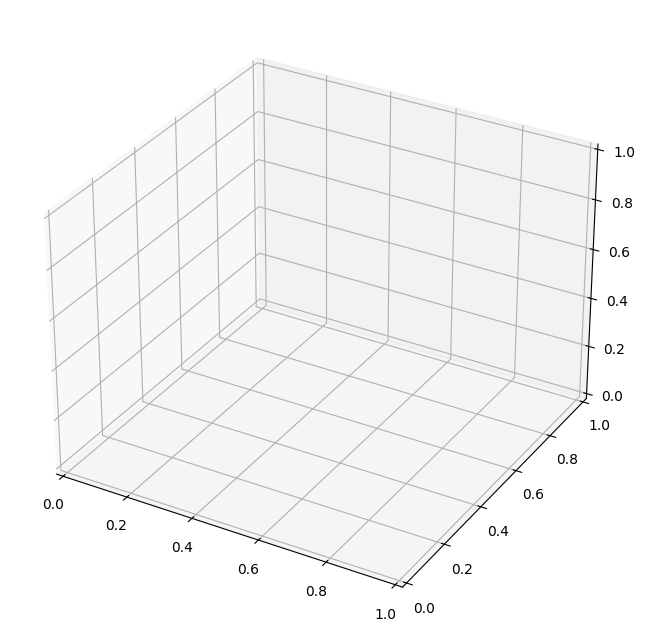

In [45]:
from mpl_toolkits.mplot3d import Axes3D

def plot_nearest_neighbors(dataframe, example_point, prediction, x_axis, y_axis, z_axis, big: bool = False):
    fig = plt.figure(figsize=(10, 8) if big else (6, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Plot nearest neighbors with different markers based on income
    for _, row in dataframe.iterrows():
        if row['income'] == '>50K':
            ax.scatter(row[x_axis], row[y_axis], row[z_axis], color='blue', marker='x', label='>50K' if '>50K' not in ax.get_legend_handles_labels()[1] else "")
        else:
            ax.scatter(row[x_axis], row[y_axis], row[z_axis], color='green', marker='o', label='<=50K' if '<=50K' not in ax.get_legend_handles_labels()[1] else "")

    # Highlight the example point
    if prediction:
        ax.scatter(example_point[x_axis], example_point[y_axis], example_point[z_axis], color='red', marker='x', label='Example Point', s=100)
    else:
        ax.scatter(example_point[x_axis], example_point[y_axis], example_point[z_axis], color='red', label='Example Point', s=100)

    # Add labels and legend
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_zlabel(z_axis)
    ax.set_title('3D Nearest Neighbors Visualization')
    ax.legend()
    plt.show()

example_point = pd.DataFrame(junge_prime_hat_sich_bayern_inter_ausgesucht)
for column, mapping in mappings.items():
    example_point[column] = example_point[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))
    
# Plotting the nearest neighbors
plot_nearest_neighbors(nearest_neighbors, example_point.iloc[0], prediction, 'age', 'hours-per-week', 'gender', big=True)
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'hours-per-week', 'gender', big=True)
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'workclass')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'fnlwgt')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'education')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'marital-status')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'occupation')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'relationship')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'race')
# plot_nearest_neighbors(nearest_neighbors_df, example_point.iloc[0], prediction, 'age', 'native-country')

# dftest = st.inverse_transform(X_test)  # Rücktransformation der Merkmale
# dftest = np.round(dftest).astype(int)
# dftest = pd.DataFrame(dftest, columns=X.columns)
# for column, mapping in mappings.items():
#     dftest[column] = dftest[column].apply(lambda x: mapping.get(x, f"Unknown ({x})"))
# dftest['income'] = y_test
# dftest['income'] = dftest['income'].apply(lambda x: '>50K' if x == 1 else '<=50K')
# plot_nearest_neighbors(dftest, example_point.iloc[0], prediction, 'age', 'hours-per-week', big=True)
